<a href="https://colab.research.google.com/github/kunal-kumar-chaudhary/covid-19-detection-using-X-ray-image-dataset/blob/main/COVID_19_COLLEGE_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b><u>COVID 19</u></b></h1></center>

we will use mixed precision to train our model. it will make our training faster. for the purpose of mixed precision training, we need a GPU with computing power of 7.0+

Google colab provides us with `Tesla T4` GPU which is suitable for model training using mixed precision. 

we will use the dataset from kaggle.

https://www.kaggle.com/khoongweihao/covid19-xray-dataset-train-test-sets

In [1]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf

we can check which GPU are we using

In [3]:
!nvidia-smi

Fri Nov  5 13:43:35 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

we are good to go as we have been allocated TESLA T4 GPU, which is very much suitable for mixed precision training.

note - in case you are not being alloted Tesla T4 GPU, try doing `factory reset runtime` and then running the cells again. as the GPU's are alloted to us randomly, so it may happen that you don't get the Tesla T4 at first time.

we will need to unzip our file first

In [4]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


made the path for train and test directory

In [5]:
train = "/content/gdrive/MyDrive/covid-19 data/xray_dataset_covid19/train"
test = "/content/gdrive/MyDrive/covid-19 data/xray_dataset_covid19/test"

### let's explore our data

In [6]:
import os
TRAIN_NORMAL = os.listdir("/content/gdrive/MyDrive/covid-19 data/xray_dataset_covid19/train/NORMAL/")
TRAIN_PNEUMONIA = os.listdir("/content/gdrive/MyDrive/covid-19 data/xray_dataset_covid19/train/PNEUMONIA/")

In [7]:
print(TRAIN_NORMAL)

['IM-0009-0001.jpeg', 'IM-0003-0001.jpeg', 'IM-0005-0001.jpeg', 'IM-0011-0001-0001.jpeg', 'IM-0011-0001-0002.jpeg', 'IM-0007-0001.jpeg', 'IM-0006-0001.jpeg', 'IM-0010-0001.jpeg', 'IM-0001-0001.jpeg', 'IM-0063-0001.jpeg', 'IM-0036-0001.jpeg', 'IM-0046-0001.jpeg', 'IM-0033-0001.jpeg', 'IM-0015-0001.jpeg', 'IM-0031-0001.jpeg', 'IM-0013-0001.jpeg', 'IM-0016-0001.jpeg', 'IM-0050-0001.jpeg', 'IM-0033-0001-0001.jpeg', 'IM-0021-0001.jpeg', 'IM-0022-0001.jpeg', 'IM-0025-0001.jpeg', 'IM-0030-0001.jpeg', 'IM-0041-0001.jpeg', 'IM-0049-0001.jpeg', 'IM-0059-0001.jpeg', 'IM-0033-0001-0002.jpeg', 'IM-0061-0001.jpeg', 'IM-0035-0001.jpeg', 'IM-0027-0001.jpeg', 'IM-0017-0001.jpeg', 'IM-0043-0001.jpeg', 'IM-0023-0001.jpeg', 'IM-0045-0001.jpeg', 'IM-0019-0001.jpeg', 'IM-0039-0001.jpeg', 'IM-0037-0001.jpeg', 'IM-0011-0001.jpeg', 'IM-0029-0001.jpeg', 'IM-0099-0001.jpeg', 'NORMAL2-IM-0023-0001.jpeg', 'IM-0093-0001.jpeg', 'IM-0103-0001.jpeg', 'NORMAL2-IM-0033-0001.jpeg', 'NORMAL2-IM-0013-0001.jpeg', 'IM-0069-0

In [8]:
print(TRAIN_PNEUMONIA)

['6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg', '5CBC2E94-D358-401E-8928-965CCD965C5C.jpeg', '39EE8E69-5801-48DE-B6E3-BE7D1BCF3092.jpeg', '1-s2.0-S1684118220300682-main.pdf-003-b1.png', '1-s2.0-S1684118220300608-main.pdf-001.jpg', '1B734A89-A1BF-49A8-A1D3-66FAFA4FAC5D.jpeg', '23E99E2E-447C-46E5-8EB2-D35D12473C39.png', '41591_2020_819_Fig1_HTML.webp-day10.png', '7C69C012-7479-493F-8722-ABC29C60A2DD.jpeg', '1312A392-67A3-4EBF-9319-810CF6DA5EF6.jpeg', '7AF6C1AF-D249-4BD2-8C26-449304105D03.jpeg', '1-s2.0-S1684118220300682-main.pdf-003-b2.png', '1-s2.0-S1684118220300682-main.pdf-002-a2.png', '2C10A413-AABE-4807-8CCE-6A2025594067.jpeg', '41591_2020_819_Fig1_HTML.webp-day5.png', '1-s2.0-S1684118220300682-main.pdf-002-a1.png', '31BA3780-2323-493F-8AED-62081B9C383B.jpeg', '01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg', '5931B64A-7B97-485D-BE60-3F1EA76BC4F0.jpeg', '1-s2.0-S0140673620303706-fx1_lrg.jpg', '1-s2.0-S1684118220300608-main.pdf-002.jpg', '2C26F453-AF3B-4517-BB9E-802CF2179543.jpeg', '5e6dd87

### Plotting Random images from training set

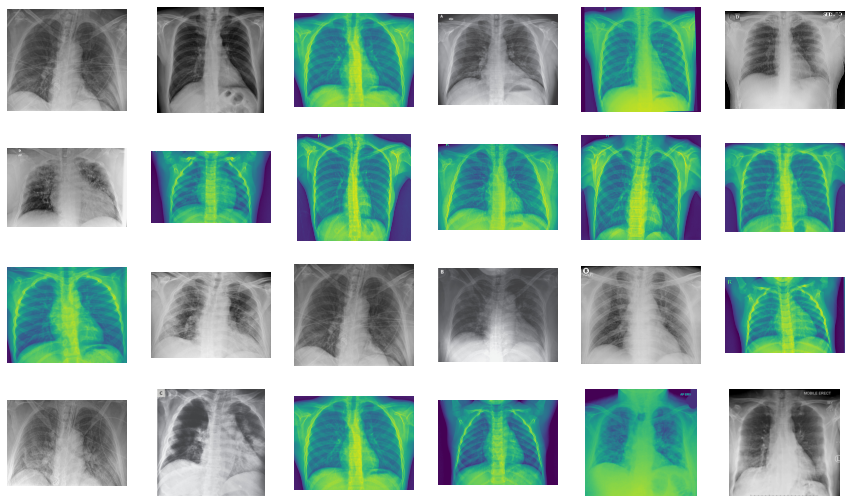

In [9]:
import random
from PIL import Image 

images = []
for folder in os.listdir(train):
  for image in os.listdir(train + '/' + folder):
    images.append(os.path.join(train, folder, image))

plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(24):
  n += 1
  random_img = random.choice(images)
  imgs = plt.imread(random_img)
  plt.subplot(4, 6, n)
  plt.axis('off')
  plt.imshow(imgs)

plt.show()

In [10]:
# OUR AIM IS TO PLOT A RANDOM IMAGE UNDER OUR MOTTO OF VISUALIZATION
import random
random = random.randint(0,len(TRAIN_NORMAL))
TRAIN_ONE_SAMPLE_NORMAL = TRAIN_NORMAL[random]
TRAIN_ONE_SAMPLE_NORMAL

'IM-0063-0001.jpeg'

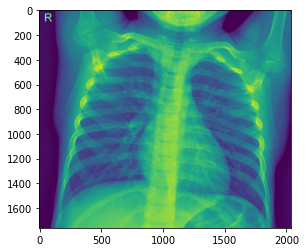

In [11]:
# now we have the random image from our list of NORMAL image training set data
img = plt.imread("/content/gdrive/MyDrive/covid-19 data/xray_dataset_covid19/train/NORMAL/"+TRAIN_ONE_SAMPLE_NORMAL)
plt.imshow(img)

In [12]:
import random
random = random.randint(0,len(TRAIN_PNEUMONIA ))
TRAIN_ONE_SAMPLE_PNEUMONIA = TRAIN_PNEUMONIA[random]
TRAIN_ONE_SAMPLE_PNEUMONIA

'1-s2.0-S0140673620303706-fx1_lrg.jpg'

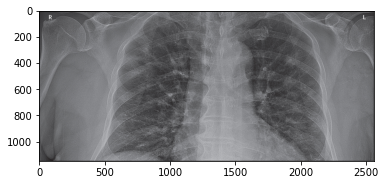

In [13]:
# now we have the random image from our list of PNEUMONIA image training set data
img = plt.imread("/content/gdrive/MyDrive/covid-19 data/xray_dataset_covid19/train/PNEUMONIA/"+TRAIN_ONE_SAMPLE_PNEUMONIA)
plt.imshow(img)

`DATA AUGMENTATION` : this is the process in which we `flip`, `rotate`, `shear`, `crop`, `zoom` our images. with this we have created new set of data on fly which will be used to train our model. this we mainly do to improve our model performance.

In [14]:
# specified our training and testing directory

train_dir = "/content/gdrive/MyDrive/covid-19 data/xray_dataset_covid19/train"
test_dir = "/content/gdrive/MyDrive/covid-19 data/xray_dataset_covid19/test"

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# we will also apply data augementation below

train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest'
                                   )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=16,
                                                    class_mode = 'categorical',
                                                    shuffle=True
                                                    )

val_datagen = ImageDataGenerator(rescale=1/255.)

validation_generator = val_datagen.flow_from_directory(test_dir,
                                                       target_size=(150,150),
                                                       batch_size=16,
                                                       class_mode='categorical',
                                                       shuffle=False)


Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


### SETTING UP MIXED PRECISION

In mixed precision, we set the global policy to float16 so as the computation will be done in float16 but the storage will be done in float32 so as to avoid the compatibality isuues.

In [15]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy="mixed_float16") # setting global policy to mixed precision.

Your GPU may run slowly with dtype policy mixed_float16 because it does not have compute capability of at least 7.0. Your GPU:
  Tesla K80, compute capability 3.7
See https://developer.nvidia.com/cuda-gpus for a list of GPUs and their compute capabilities.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


In [16]:
mixed_precision.global_policy() # Now we can see it successfully set to float16

<Policy "mixed_float16">

### CREATING CALLBACKS

In [17]:
import datetime
# create tensorboard callback

def create_tensorboard_callback(dir_name, experiment_name):
  """
  this function will create tensorboard callback instance to store the log files.
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"saving log files to : {log_dir}")
  return tensorboard_callback

# creating model checkpoint callback to save the model's progress
checkpoint_path = "model_checkpoints/cp.ckpt" # saving requires '.ckpt' extension
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                      monitor = 'val_accuracy', # save the model weight with best validation accuracy 
                                                      save_best_only = True, # only save the best weights
                                                      save_weight_only = True ) # only save models weights (not the whole model) 

# creating early stopping callback
early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=5,
                                                           restore_best_weights = True)
                                                  

## MODEL 1 : TRANSFER LEARNING WITH FEATURE EXTRACTION USING FUNCTIONAL API USING `VGG16` BASE MODEL

In [18]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# create base model
input_shape = (150, 150, 3)
base_model = tf.keras.applications.VGG16(include_top=False)
base_model.trainable = False # we will freeze the base model layers

# create functional model
inputs = layers.Input(shape=input_shape, name="input_layer")
x = base_model(inputs, training = False) # setting base model to inference mode only
x = layers.Flatten(name='flattening_layer')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(2, activation='sigmoid')(x)
model_1 = tf.keras.Model(inputs, outputs)

# let's compile the model
model_1.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(lr=0.001),
              metrics=['accuracy',
                       tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall()])

58900480/58889256 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [19]:
model_1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 150, 150, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
flattening_layer (Flatten)   (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 514       
Total params: 16,812,610
Trainable params: 2,097,922
Non-trainable params: 14,714,688
_________________________________________

In [20]:
model_1.layers

In [21]:
# layers inside the VGG19 base model
base_model_layers = model_1.layers[1].layers
len(base_model_layers)

19

In [22]:
# let's see our base model layers in nice way
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool


In [23]:
# checking layer "dtype policies"
for layer in model_1.layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer True float32 <Policy "float32">
vgg16 False float32 <Policy "mixed_float16">
flattening_layer True float32 <Policy "mixed_float16">
dense True float32 <Policy "mixed_float16">
dropout True float32 <Policy "mixed_float16">
dense_1 True float32 <Policy "mixed_float16">


In [24]:
# we can also check the layers dtype policies for our base model too
for layer in base_model.layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_1 False float32 <Policy "float32">
block1_conv1 False float32 <Policy "mixed_float16">
block1_conv2 False float32 <Policy "mixed_float16">
block1_pool False float32 <Policy "mixed_float16">
block2_conv1 False float32 <Policy "mixed_float16">
block2_conv2 False float32 <Policy "mixed_float16">
block2_pool False float32 <Policy "mixed_float16">
block3_conv1 False float32 <Policy "mixed_float16">
block3_conv2 False float32 <Policy "mixed_float16">
block3_conv3 False float32 <Policy "mixed_float16">
block3_pool False float32 <Policy "mixed_float16">
block4_conv1 False float32 <Policy "mixed_float16">
block4_conv2 False float32 <Policy "mixed_float16">
block4_conv3 False float32 <Policy "mixed_float16">
block4_pool False float32 <Policy "mixed_float16">
block5_conv1 False float32 <Policy "mixed_float16">
block5_conv2 False float32 <Policy "mixed_float16">
block5_conv3 False float32 <Policy "mixed_float16">
block5_pool False float32 <Policy "mixed_float16">


In [25]:
# let's train our model on our training data
history_1 = model_1.fit(train_generator, epochs=5, steps_per_epoch=len(train_generator),
                      validation_data = validation_generator,
                      validation_steps = len(validation_generator),
                      callbacks=[create_tensorboard_callback("training_logs", "VGG16"), 
                                 model_checkpoint, early_stopping_callback ])

saving log files to : training_logs/VGG16/211105-134446
Epoch 1/5
10/10 [==============================] - 71s 4s/step - loss: 2.6988 - accuracy: 0.6081 - precision: 0.5699 - recall: 0.7432 - val_loss: 0.7072 - val_accuracy: 0.5750 - val_precision: 0.6491 - val_recall: 0.9250
INFO:tensorflow:Assets written to: model_checkpoints/cp.ckpt/assets
Epoch 2/5
10/10 [==============================] - 8s 760ms/step - loss: 0.6191 - accuracy: 0.7297 - precision: 0.6269 - recall: 0.8514 - val_loss: 0.3074 - val_accuracy: 0.9000 - val_precision: 0.6897 - val_recall: 1.0000
INFO:tensorflow:Assets written to: model_checkpoints/cp.ckpt/assets
Epoch 3/5
10/10 [==============================] - 8s 792ms/step - loss: 0.5819 - accuracy: 0.7703 - precision: 0.6650 - recall: 0.8986 - val_loss: 0.2184 - val_accuracy: 0.8750 - val_precision: 0.8511 - val_recall: 1.0000
Epoch 4/5
10/10 [==============================] - 8s 749ms/step - loss: 0.3203 - accuracy: 0.8581 - precision: 0.7245 - recall: 0.9595 - val

### let's make a function to plot the loss curves

In [26]:
history_1.history['precision']

[0.5699481964111328,
 0.6268656849861145,
 0.6650000214576721,
 0.7244898080825806,
 0.7692307829856873]

In [27]:
def plot_loss_curves(history):
  """
  this function will plot the loss curves
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  
  epochs = range(len(history.history['loss']))

  # plot loss curve
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='validation_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # plot accuracy curve
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='valiation_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

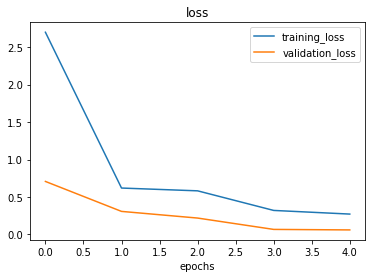

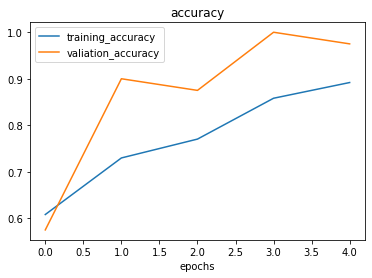

In [28]:
# let's plot the loss and accuracy curves
plot_loss_curves(history_1)

remember -  we have tradeoff between precision and recall. we can only keep one high at a time.

In [29]:
history_1.history['recall']

[0.7432432174682617,
 0.8513513803482056,
 0.8986486196517944,
 0.9594594836235046,
 0.9459459185600281]

recall = true positives / ( true positives + false negatives )

precision = true positives / ( true positives + false positives )

In [30]:
validation_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [31]:
pred_prob = model_1.predict(validation_generator)
pred_prob[:10]

array([[0.9336 , 0.1    ],
       [0.6655 , 0.3833 ],
       [0.948  , 0.10144],
       [0.8076 , 0.2222 ],
       [0.8115 , 0.1677 ],
       [0.5806 , 0.4421 ],
       [0.9385 , 0.10803],
       [0.9185 , 0.1622 ],
       [0.959  , 0.0646 ],
       [0.892  , 0.1204 ]], dtype=float16)

In [32]:
y_pred_1 = tf.argmax(pred_prob, axis=1)
y_pred_1

<tf.Tensor: shape=(40,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])>

In [33]:
true_label = validation_generator.classes
true_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

## let's make a function to get the precision, recall, accuracy in dictionary format

we are going to get the `precision`, `recall` and `accuracy` of a model from it's history and will arrange them in dictionary. this dictionary will help us later in graph making or rather i should say visualization of the classification metrics of different models. one could easily distinguish between the different classification metrics of different models.

we will focus on validation parameters because we will be judging our model performance with these validation parameters.

In [36]:
def calculate_metrics(y_true, y_pred):
  accuracy = tf.keras.metrics.BinaryAccuracy(name = 'binary_accuracy', threshold=0.5)
  accuracy.update_state(y_true, y_pred)
  acc = accuracy.result().numpy()
  precision = tf.keras.metrics.Precision()
  precision.update_state(y_true, y_pred)
  prec = precision.result().numpy()
  recall = tf.keras.metrics.Recall()
  recall.update_state(y_true, y_pred)
  rec = recall.result().numpy()

  dict = {
      'accuracy': acc,
      'precision': prec,
      'recall': rec
  }
  return dict


calculate_metrics(true_label, y_pred_1)

{'accuracy': 0.975, 'precision': 0.95238096, 'recall': 1.0}

In [37]:
# def metrics(history):
#   """
#   this function will take the history of a model and will return different parameters.
#   this function will return 'precision', 'recall' and 'accuracy' as parameters.
#   """
#   val_accuracy = history.history['val_accuracy']
#   val_precision = history.history['val_precision']
#   val_recall = history.history['val_recall']
#   dict = {
#       "val_accuracy": val_accuracy[-1],
#       "val_precision": val_precision[-1],
#       "val_recall": val_recall[-1]
#   }
#   return dict

In [39]:
model_1_parameters = calculate_metrics(true_label, y_pred_1)
model_1_parameters

{'accuracy': 0.975, 'precision': 0.95238096, 'recall': 1.0}

### Evaluating our model's performance

In [40]:
model_1.evaluate(validation_generator)

3/3 [==============================] - 1s 349ms/step - loss: 0.0602 - accuracy: 0.9750 - precision: 0.9750 - recall: 0.9750


[0.0601654052734375,
 0.9750000238418579,
 0.9750000238418579,
 0.9750000238418579]

### Making a custom function for prediction on a single image

In [41]:
import cv2
import numpy as np

In [42]:
class_names =  list(train_generator.class_indices)
class_names

['NORMAL', 'PNEUMONIA']

In [43]:
# def make_prediction(filepath):
def make_prediction(filepath):
  test_image = cv2.imread(filepath)
  test_image = cv2.resize(test_image, (150,150), interpolation=cv2.INTER_CUBIC)
  plt.imshow(test_image)
  print('original shape of image :',test_image.shape)
  test_image = np.expand_dims(test_image, axis=0)
  print('dimensions of image array after reshaping :',test_image.shape)
  probs = model_1.predict(test_image)
  print('prediction probability',probs)
  pred_class = np.argmax(probs)
  print('prediction class',pred_class)
  pred_class = class_names[pred_class]
  print("prediction class : ", pred_class)

original shape of image : (150, 150, 3)
dimensions of image array after reshaping : (1, 150, 150, 3)
prediction probability [[0. 1.]]
prediction class 1
prediction class :  PNEUMONIA


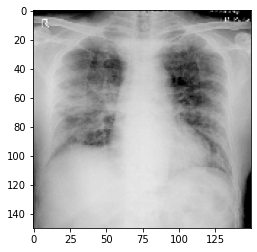

In [44]:
filepath = "/content/gdrive/MyDrive/covid-19 data/xray_dataset_covid19/test/PNEUMONIA/ryct.2020200034.fig5-day4.jpeg"
make_prediction(filepath)

### Confusion Matrix

In [45]:
!pip install -q scikit-plot

In [46]:
import scikitplot as skplt
def confusion_matrix(y_true, y_pred):
  skplt.metrics.plot_confusion_matrix(y_true, y_pred, figsize=(10,7))

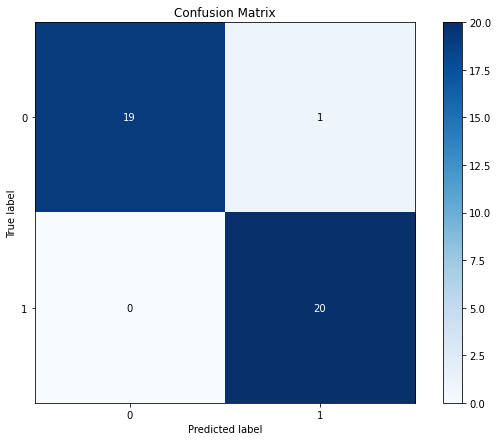

In [48]:
confusion_matrix(true_label, y_pred_1)

### ROC (Reciever Operating Characterstics) curve

The more the area under curve, the better our model is performing.

In [49]:
def roc_curve(y_true, y_pred):
  """
  this function will take actual labels and predicted labels and return the ROC curve 
  """
  from sklearn.metrics import roc_curve, auc

  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_true, y_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate) 
  plt.figure(figsize=(10,8))
  plt.title("ROC curve")
  plt.plot(false_positive_rate, true_positive_rate, color="red", label = 'Area Under Curve = %0.2f' % roc_auc)
  plt.legend(loc='lower right')
  plt.plot([0, 1], [0, 1],linestyle='--')
  plt.axis('tight')
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate') 
  

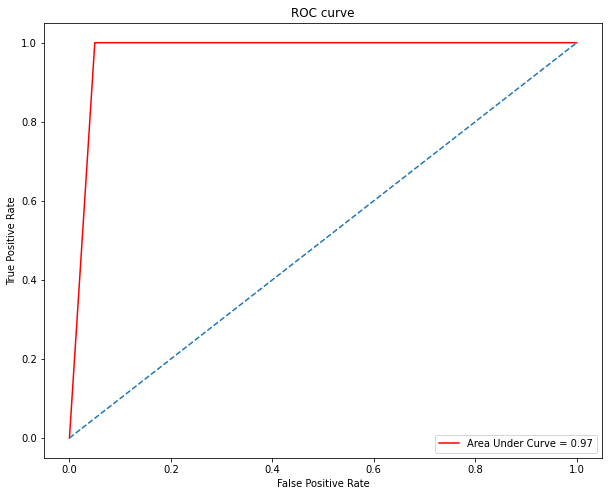

In [51]:
roc_curve(true_label, y_pred_1)

## MODEL 2: CONVOLUTIONAL NEURAL NETWORK

we will make CNN model with custom layers. we will use no pretrained layers here like we use in case of transfer learning

In [52]:
# we will use the sequential API here

model_2 = tf.keras.models.Sequential(
    [
     
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    
    # let's flatten the results to feed into a dense model
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
    ], name = 'model_2'
)

# let's compile model_2

model_2.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [53]:
# let's fit our model on training data and validate simultaneously on validation data

history_2 = model_2.fit(train_generator, epochs=10, steps_per_epoch=len(train_generator),
                      validation_data = validation_generator,
                      validation_steps = len(validation_generator),
                      callbacks=[create_tensorboard_callback("training_logs", "CNN_model_with_custom_layer"), 
                                 model_checkpoint, early_stopping_callback ])

saving log files to : training_logs/CNN_model_with_custom_layer/211105-134838
Epoch 1/10
10/10 [==============================] - 11s 848ms/step - loss: 1.2029 - accuracy: 0.4595 - val_loss: 0.6848 - val_accuracy: 0.7250
Epoch 2/10
10/10 [==============================] - 7s 748ms/step - loss: 0.7058 - accuracy: 0.5270 - val_loss: 0.6615 - val_accuracy: 0.9250
Epoch 3/10
10/10 [==============================] - 7s 755ms/step - loss: 0.6428 - accuracy: 0.6892 - val_loss: 0.4098 - val_accuracy: 0.9500
Epoch 4/10
10/10 [==============================] - 7s 749ms/step - loss: 1.5305 - accuracy: 0.6554 - val_loss: 0.5165 - val_accuracy: 0.7250
Epoch 5/10
10/10 [==============================] - 7s 792ms/step - loss: 0.5230 - accuracy: 0.7635 - val_loss: 0.2682 - val_accuracy: 0.9500
Epoch 6/10
10/10 [==============================] - 7s 759ms/step - loss: 0.5176 - accuracy: 0.7905 - val_loss: 0.2920 - val_accuracy: 0.9750
Epoch 7/10
10/10 [==============================] - 7s 749ms/step - l

In [54]:
# let's view the summary of the model_2
model_2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        3692

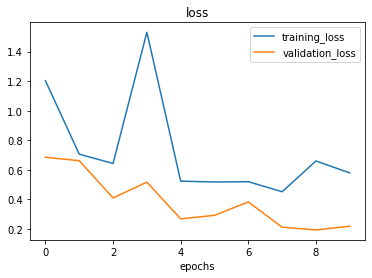

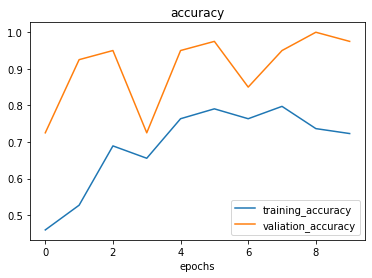

In [55]:
# let's plot loss and accuracy curves
plot_loss_curves(history_2)

In [56]:
y_pred_2 = model_2.predict(validation_generator)
y_pred_2 = tf.argmax(y_pred_2, axis=1)
y_pred_2
# from sklearn.metrics import accuracy_score, precision_score
# print(accuracy_score(true_label, y_predd))
# print(precision_score(true_label, y_predd))

<tf.Tensor: shape=(40,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])>

In [58]:
# let's see the different evaluation metrics for model_2
model_2_parameters = calculate_metrics(true_label, y_pred_2)
model_2_parameters

{'accuracy': 0.975, 'precision': 1.0, 'recall': 0.95}

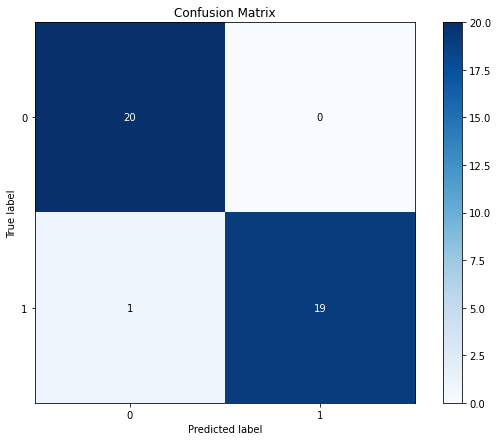

In [59]:
# Let's see the confusion matrix for model_2
confusion_matrix(true_label, y_pred_2)

In [60]:
model_2.evaluate(validation_generator)

3/3 [==============================] - 1s 344ms/step - loss: 0.2182 - accuracy: 0.9750


[0.21823731064796448, 0.9750000238418579]

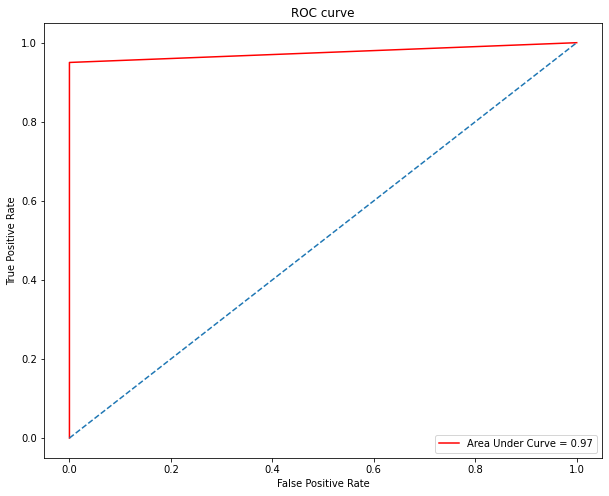

In [61]:
# let's see the ROC curve 
roc_curve(true_label, y_pred_2)

## MODEL 3: TRANSFER LEARNING WITH FEATURE EXTRACTION USING FUNCTIONAL API USING `InceptionV3` BASE MODEL

credit of below image - https://towardsdatascience.com/complete-architectural-details-of-all-efficientnet-models-5fd5b736142

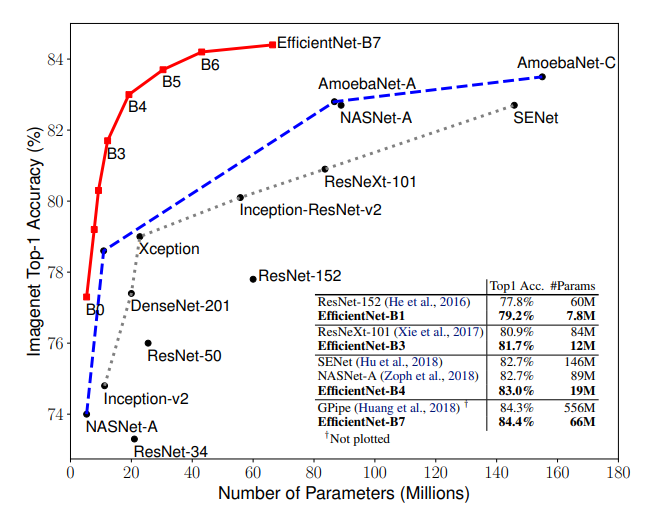

In [62]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# create base model
input_shape = (150,150,3)
base_model = tf.keras.applications.InceptionV3(include_top=False)
base_model.trainable = False # we will freeze the base model layers

# create functional model
inputs = layers.Input(shape=input_shape, name='input_layer')
x = base_model(inputs, training=False) # setting base model to inference mode 
x = layers.Flatten(name='flattening_layer')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(2, activation='sigmoid')(x)
model_3 = tf.keras.Model(inputs, outputs)

# let's compile the model
model_3.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(lr=0.001),
              metrics=['accuracy'])

87924736/87910968 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [63]:
history_3 = model_3.fit(train_generator, epochs=5, steps_per_epoch=len(train_generator),
                      validation_data = validation_generator,
                      validation_steps = len(validation_generator),
                      callbacks=[create_tensorboard_callback("training_logs", "InceptionV3"), 
                                 model_checkpoint, early_stopping_callback ])

saving log files to : training_logs/InceptionV3/211105-135052
Epoch 1/5
10/10 [==============================] - 18s 1s/step - loss: 132.0529 - accuracy: 0.5608 - val_loss: 32.8750 - val_accuracy: 0.5000
Epoch 2/5
10/10 [==============================] - 8s 703ms/step - loss: 36.8167 - accuracy: 0.6081 - val_loss: 2.2102 - val_accuracy: 0.9250
Epoch 3/5
10/10 [==============================] - 8s 762ms/step - loss: 9.1868 - accuracy: 0.8243 - val_loss: 4.3375 - val_accuracy: 0.9000
Epoch 4/5
10/10 [==============================] - 8s 772ms/step - loss: 5.5264 - accuracy: 0.8041 - val_loss: 5.7688 - val_accuracy: 0.8500
Epoch 5/5
10/10 [==============================] - 8s 779ms/step - loss: 3.8047 - accuracy: 0.8851 - val_loss: 15.8906 - val_accuracy: 0.7250


In [64]:
model_3.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 150, 150, 3)]     0         
_________________________________________________________________
inception_v3 (Functional)    (None, None, None, 2048)  21802784  
_________________________________________________________________
flattening_layer (Flatten)   (None, 18432)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               9437696   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 1026      
Total params: 31,241,506
Trainable params: 9,438,722
Non-trainable params: 21,802,784
_______________________________________

In [65]:
model_3.layers

In [66]:
# let's dive deeper and see different layers present inside our base model
for layer_number, layer in enumerate(model_3.layers[1].layers):
  print(layer_number, layer.dtype_policy, layer.name, layer.trainable)

0 <Policy "float32"> input_2 False
1 <Policy "mixed_float16"> conv2d_4 False
2 <Policy "mixed_float16"> batch_normalization False
3 <Policy "mixed_float16"> activation False
4 <Policy "mixed_float16"> conv2d_5 False
5 <Policy "mixed_float16"> batch_normalization_1 False
6 <Policy "mixed_float16"> activation_1 False
7 <Policy "mixed_float16"> conv2d_6 False
8 <Policy "mixed_float16"> batch_normalization_2 False
9 <Policy "mixed_float16"> activation_2 False
10 <Policy "mixed_float16"> max_pooling2d_4 False
11 <Policy "mixed_float16"> conv2d_7 False
12 <Policy "mixed_float16"> batch_normalization_3 False
13 <Policy "mixed_float16"> activation_3 False
14 <Policy "mixed_float16"> conv2d_8 False
15 <Policy "mixed_float16"> batch_normalization_4 False
16 <Policy "mixed_float16"> activation_4 False
17 <Policy "mixed_float16"> max_pooling2d_5 False
18 <Policy "mixed_float16"> conv2d_12 False
19 <Policy "mixed_float16"> batch_normalization_8 False
20 <Policy "mixed_float16"> activation_8 False
2

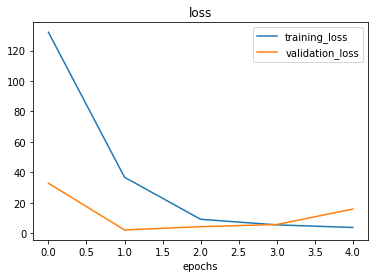

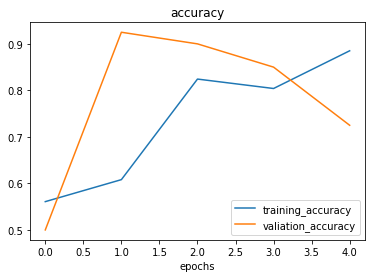

In [67]:
# plotting loss and accuracy curves for model_3
plot_loss_curves(history_3)

In [68]:
model_3.evaluate(validation_generator)

3/3 [==============================] - 1s 369ms/step - loss: 15.8906 - accuracy: 0.7250


[15.890625, 0.7250000238418579]

In [69]:
# making predictions
pred_prob = model_3.predict(validation_generator)
y_pred_3 = tf.argmax(pred_prob, axis=1)
y_pred_3

<tf.Tensor: shape=(40,), dtype=int64, numpy=
array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])>

In [71]:
# let's see the different evaluation metrics for our model_3
model_3_parameters = calculate_metrics(true_label, y_pred_3)
model_3_parameters

{'accuracy': 0.725, 'precision': 0.6451613, 'recall': 1.0}

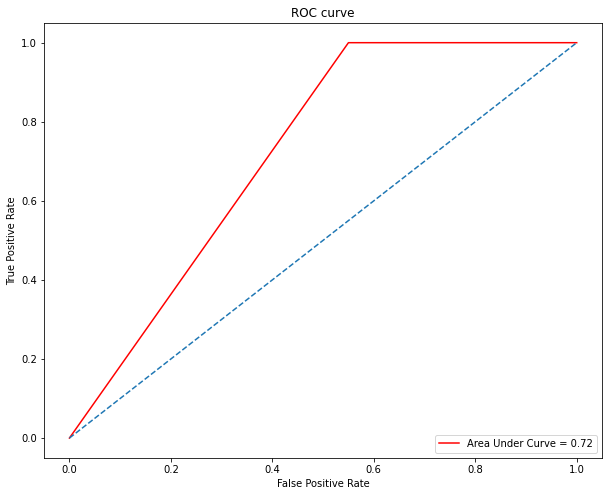

In [72]:
# let's see the ROC curve
roc_curve(true_label, y_pred_3)

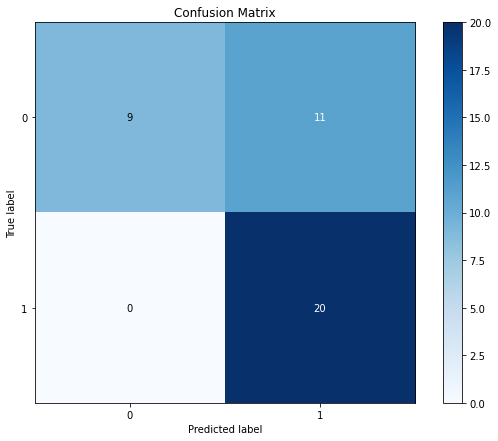

In [73]:
# plotting confusion matrix for model_3
confusion_matrix(true_label, y_pred_3)

## MODEL 4: TRANSFER LEARNING WITH FEATURE EXTRACTION USING FUNCTIONAL API USING `InceptionResNetV2` BASE MODEL

In [74]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# create base model
input_shape = (150,150,3)
base_model = tf.keras.applications.InceptionResNetV2(include_top=False)
base_model.trainable = False # we will freeze the base model layers

# create functional model
inputs = layers.Input(shape=input_shape, name='input_layer')
x = base_model(inputs, training=False) # setting base model to inference mode 
x = layers.Flatten(name='flattening_layer')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(2, activation='sigmoid')(x)
model_4 = tf.keras.Model(inputs, outputs)

# let's compile the model
model_4.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(lr=0.001),
              metrics=['accuracy'])

219070464/219055592 [==============================] - 3s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [186]:
history_4 = model_4.fit(train_generator, epochs=10, steps_per_epoch=len(train_generator),
                      validation_data = validation_generator,
                      validation_steps = len(validation_generator),
                      callbacks=[create_tensorboard_callback("training_logs", "InceptionResNetV2"), 
                                 model_checkpoint, early_stopping_callback ])

saving log files to : training_logs/InceptionResNetV2/211105-140848
Epoch 1/10
10/10 [==============================] - 9s 884ms/step - loss: 5.8064 - accuracy: 0.7230 - val_loss: 1.7062 - val_accuracy: 0.9000
Epoch 2/10
10/10 [==============================] - 8s 776ms/step - loss: 3.4609 - accuracy: 0.7365 - val_loss: 3.2375 - val_accuracy: 0.9000
Epoch 3/10
10/10 [==============================] - 8s 778ms/step - loss: 2.5496 - accuracy: 0.7770 - val_loss: 1.2945 - val_accuracy: 0.9000
Epoch 4/10
10/10 [==============================] - 8s 813ms/step - loss: 2.1063 - accuracy: 0.8514 - val_loss: 6.6094 - val_accuracy: 0.9500
Epoch 5/10
10/10 [==============================] - 8s 843ms/step - loss: 4.9297 - accuracy: 0.8041 - val_loss: 1.2924 - val_accuracy: 0.9000
Epoch 6/10
10/10 [==============================] - 8s 840ms/step - loss: 2.9879 - accuracy: 0.7973 - val_loss: 2.3797 - val_accuracy: 0.8500
Epoch 7/10
10/10 [==============================] - 8s 772ms/step - loss: 1.6613

In [187]:
model_4.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 150, 150, 3)]     0         
_________________________________________________________________
inception_resnet_v2 (Functio (None, None, None, 1536)  54336736  
_________________________________________________________________
flattening_layer (Flatten)   (None, 13824)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               7078400   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 1026      
Total params: 61,416,162
Trainable params: 7,079,426
Non-trainable params: 54,336,736
_______________________________________

In [188]:
# let's explore the layers of our base model (InceptionResNetV2)
for layer_number, layer in enumerate(model_4.layers[1].layers):
  print(layer_number, " ", layer.name, layer.dtype_policy, layer.trainable)

0   input_3 <Policy "float32"> False
1   conv2d_98 <Policy "mixed_float16"> False
2   batch_normalization_94 <Policy "mixed_float16"> False
3   activation_94 <Policy "mixed_float16"> False
4   conv2d_99 <Policy "mixed_float16"> False
5   batch_normalization_95 <Policy "mixed_float16"> False
6   activation_95 <Policy "mixed_float16"> False
7   conv2d_100 <Policy "mixed_float16"> False
8   batch_normalization_96 <Policy "mixed_float16"> False
9   activation_96 <Policy "mixed_float16"> False
10   max_pooling2d_8 <Policy "mixed_float16"> False
11   conv2d_101 <Policy "mixed_float16"> False
12   batch_normalization_97 <Policy "mixed_float16"> False
13   activation_97 <Policy "mixed_float16"> False
14   conv2d_102 <Policy "mixed_float16"> False
15   batch_normalization_98 <Policy "mixed_float16"> False
16   activation_98 <Policy "mixed_float16"> False
17   max_pooling2d_9 <Policy "mixed_float16"> False
18   conv2d_106 <Policy "mixed_float16"> False
19   batch_normalization_102 <Policy "mixed

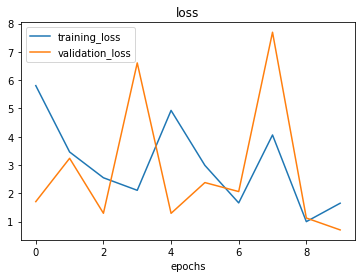

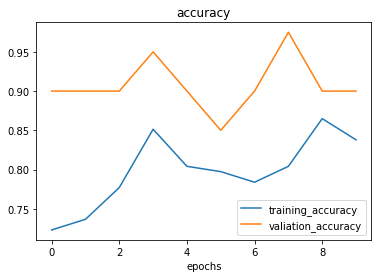

In [189]:
# let's see the loss and accuracy curve for model_4
plot_loss_curves(history_4)

In [199]:
model_4.evaluate(validation_generator)

3/3 [==============================] - 1s 371ms/step - loss: 0.7061 - accuracy: 0.9000


[0.7060712575912476, 0.8999999761581421]

In [200]:
pred_prob = model_4.predict(validation_generator)
pred_prob[:10]

array([[0.984  , 0.     ],
       [0.     , 0.     ],
       [0.     , 0.     ],
       [0.     , 0.     ],
       [0.     , 0.     ],
       [0.     , 0.     ],
       [0.     , 0.     ],
       [0.     , 0.     ],
       [0.     , 0.     ],
       [0.00423, 0.     ]], dtype=float16)

In [201]:
y_pred_4 = tf.argmax(pred_prob, axis=1)
y_pred_4

<tf.Tensor: shape=(40,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])>

In [202]:
# let's calculate the different scores from different metrics
model_4_parameters = calculate_metrics(true_label, y_pred_4)
model_4_parameters

{'accuracy': 0.9, 'precision': 1.0, 'recall': 0.8}

In [203]:
roc_curve(true_label, y_pred_4)

(array([0., 0., 1.]), array([0. , 0.8, 1. ]), array([2, 1, 0]))

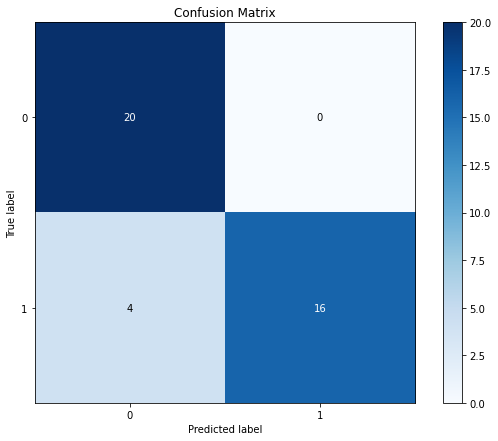

In [204]:
# let's see the confusion matrix for model_4 performance
confusion_matrix(true_label, y_pred_4)

## MODEL 5: TRANSFER LEARNING WITH FEATURE EXTRACTION USING FUNCTIONAL API USING `Xception` BASE MODEL

In [86]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# create base model
input_shape = (150,150,3)
base_model = tf.keras.applications.Xception(include_top=False)
base_model.trainable = False # we will freeze the base model layers

# create functional model
inputs = layers.Input(shape=input_shape, name='input_layer')
x = base_model(inputs, training=False) # setting base model to inference mode 
x = layers.Flatten(name='flattening_layer')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(2, activation='sigmoid')(x)
model_5 = tf.keras.Model(inputs, outputs)

# let's compile the model
model_5.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(lr=0.001),
              metrics=['accuracy'])

83697664/83683744 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [87]:
history_5 = model_5.fit(train_generator, epochs=5, steps_per_epoch=len(train_generator),
                      validation_data = validation_generator,
                      validation_steps = len(validation_generator),
                      callbacks=[create_tensorboard_callback("training_logs", "Xception"), 
                                 model_checkpoint, early_stopping_callback ])

saving log files to : training_logs/Xception/211105-135405


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/5
10/10 [==============================] - 26s 2s/step - loss: 67.4511 - accuracy: 0.5676 - val_loss: 13.4312 - val_accuracy: 0.8500
Epoch 2/5
10/10 [==============================] - 8s 782ms/step - loss: 16.0241 - accuracy: 0.7568 - val_loss: 12.9251 - val_accuracy: 0.9000
Epoch 3/5
10/10 [==============================] - 8s 765ms/step - loss: 6.7542 - accuracy: 0.8311 - val_loss: 4.2125 - val_accuracy: 0.9000
Epoch 4/5
10/10 [==============================] - 8s 781ms/step - loss: 4.8814 - accuracy: 0.8784 - val_loss: 0.0163 - val_accuracy: 1.0000
Epoch 5/5
10/10 [==============================] - 8s 790ms/step - loss: 4.8559 - accuracy: 0.8446 - val_loss: 0.0179 - val_accuracy: 0.9750


In [88]:
model_5.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 150, 150, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, None, None, 2048)  20861480  
_________________________________________________________________
flattening_layer (Flatten)   (None, 51200)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               26214912  
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 1026      
Total params: 47,077,418
Trainable params: 26,215,938
Non-trainable params: 20,861,480
______________________________________

In [89]:
# let's explore the layers of our base model
for layer_number, layer in enumerate(model_5.layers[1].layers):
  print(layer_number, " ", layer.name, layer.trainable, layer.dtype_policy)

0   input_4 False <Policy "float32">
1   block1_conv1 False <Policy "mixed_float16">
2   block1_conv1_bn False <Policy "mixed_float16">
3   block1_conv1_act False <Policy "mixed_float16">
4   block1_conv2 False <Policy "mixed_float16">
5   block1_conv2_bn False <Policy "mixed_float16">
6   block1_conv2_act False <Policy "mixed_float16">
7   block2_sepconv1 False <Policy "mixed_float16">
8   block2_sepconv1_bn False <Policy "mixed_float16">
9   block2_sepconv2_act False <Policy "mixed_float16">
10   block2_sepconv2 False <Policy "mixed_float16">
11   block2_sepconv2_bn False <Policy "mixed_float16">
12   conv2d_301 False <Policy "mixed_float16">
13   block2_pool False <Policy "mixed_float16">
14   batch_normalization_297 False <Policy "mixed_float16">
15   add False <Policy "mixed_float16">
16   block3_sepconv1_act False <Policy "mixed_float16">
17   block3_sepconv1 False <Policy "mixed_float16">
18   block3_sepconv1_bn False <Policy "mixed_float16">
19   block3_sepconv2_act False <Poli

In [90]:
# evaluating our model on validation data set
model_5.evaluate(validation_generator)

3/3 [==============================] - 1s 362ms/step - loss: 0.0179 - accuracy: 0.9750


[0.01787109300494194, 0.9750000238418579]

In [91]:
# let's make the prediction over whole validation dataset
pred_prob = model_5.predict(validation_generator)
pred_prob[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float16)

In [92]:
# now let's extract the real classes predicted for the output we got our predicted probabilities
y_pred_5 = tf.argmax(pred_prob, axis=1)
y_pred_5

<tf.Tensor: shape=(40,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])>

In [95]:
# let's see the score of different evaluation matrix for model_5
model_5_parameters = calculate_metrics(true_label, y_pred_5)
model_5_parameters

{'accuracy': 0.975, 'precision': 1.0, 'recall': 0.95}

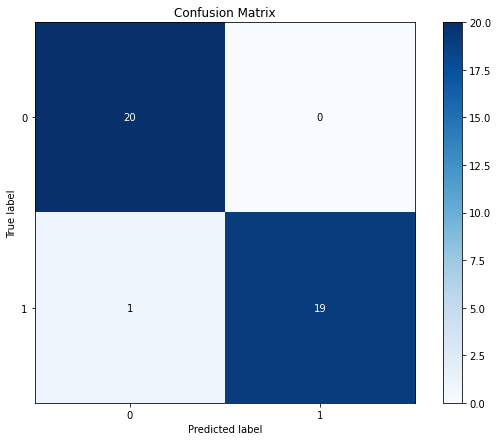

In [96]:
# let's see the confusion matrix for the model_5 performance
confusion_matrix(true_label, y_pred_5)

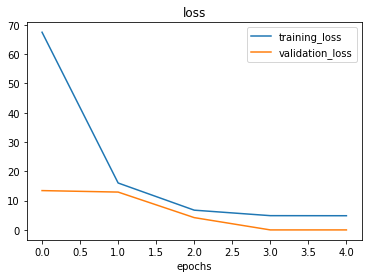

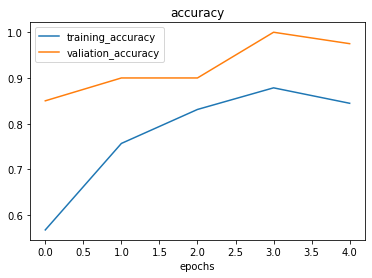

In [97]:
# let's plot the loss and accuracy curves
plot_loss_curves(history_5)

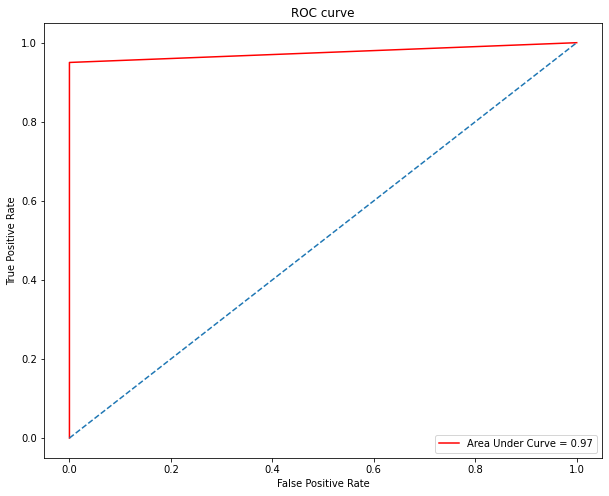

In [98]:
# let's see the roc curve
roc_curve(true_label, y_pred_5)

## MODEL 6: TRANSFER LEARNING WITH FEATURE EXTRACTION USING FUNCTIONAL API USING `MobileNet` BASE MODEL

In [99]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# create base model
input_shape = (150,150,3)
base_model = tf.keras.applications.MobileNet(include_top=False)
base_model.trainable = False # we will freeze the base model layers

# create functional model
inputs = layers.Input(shape=input_shape, name='input_layer')
x = base_model(inputs, training=False) # setting base model to inference mode 
x = layers.Flatten(name='flattening_layer')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(2, activation='sigmoid')(x)
model_6 = tf.keras.Model(inputs, outputs)

# let's compile the model
model_6.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(lr=0.001),
              metrics=['accuracy'])

17235968/17225924 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [100]:
history_6 = model_6.fit(train_generator, epochs=10, steps_per_epoch=len(train_generator),
                      validation_data = validation_generator,
                      validation_steps = len(validation_generator),
                      callbacks=[create_tensorboard_callback("training_logs", "MobileNet"), 
                                 model_checkpoint, early_stopping_callback ])

saving log files to : training_logs/MobileNet/211105-135533
Epoch 1/10
10/10 [==============================] - 16s 1s/step - loss: 48.1809 - accuracy: 0.7432 - val_loss: 17.2672 - val_accuracy: 0.6500
Epoch 2/10
10/10 [==============================] - 7s 753ms/step - loss: 17.3486 - accuracy: 0.7568 - val_loss: 0.9203 - val_accuracy: 0.9500
Epoch 3/10
10/10 [==============================] - 7s 724ms/step - loss: 6.2575 - accuracy: 0.8514 - val_loss: 0.3869 - val_accuracy: 0.9750
Epoch 4/10
10/10 [==============================] - 7s 720ms/step - loss: 3.8159 - accuracy: 0.8986 - val_loss: 0.8828 - val_accuracy: 0.9500
Epoch 5/10
10/10 [==============================] - 7s 767ms/step - loss: 5.5640 - accuracy: 0.8986 - val_loss: 1.0523 - val_accuracy: 0.9500
Epoch 6/10
10/10 [==============================] - 7s 746ms/step - loss: 0.8413 - accuracy: 0.9257 - val_loss: 0.5242 - val_accuracy: 0.9500
Epoch 7/10
10/10 [==============================] - 7s 704ms/step - loss: 3.7454 - accu

In [101]:
# model's summary
model_6.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 150, 150, 3)]     0         
_________________________________________________________________
mobilenet_1.00_224 (Function (None, None, None, 1024)  3228864   
_________________________________________________________________
flattening_layer (Flatten)   (None, 16384)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               8389120   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 1026      
Total params: 11,619,010
Trainable params: 8,390,146
Non-trainable params: 3,228,864
________________________________________

In [102]:
# let's see the layers of our base model
for layer_number, layer in enumerate(model_6.layers[1].layers):
  print(layer_number, " ", layer.name, layer.dtype_policy, layer.trainable)

0   input_5 <Policy "float32"> False
1   conv1 <Policy "mixed_float16"> False
2   conv1_bn <Policy "mixed_float16"> False
3   conv1_relu <Policy "mixed_float16"> False
4   conv_dw_1 <Policy "mixed_float16"> False
5   conv_dw_1_bn <Policy "mixed_float16"> False
6   conv_dw_1_relu <Policy "mixed_float16"> False
7   conv_pw_1 <Policy "mixed_float16"> False
8   conv_pw_1_bn <Policy "mixed_float16"> False
9   conv_pw_1_relu <Policy "mixed_float16"> False
10   conv_pad_2 <Policy "mixed_float16"> False
11   conv_dw_2 <Policy "mixed_float16"> False
12   conv_dw_2_bn <Policy "mixed_float16"> False
13   conv_dw_2_relu <Policy "mixed_float16"> False
14   conv_pw_2 <Policy "mixed_float16"> False
15   conv_pw_2_bn <Policy "mixed_float16"> False
16   conv_pw_2_relu <Policy "mixed_float16"> False
17   conv_dw_3 <Policy "mixed_float16"> False
18   conv_dw_3_bn <Policy "mixed_float16"> False
19   conv_dw_3_relu <Policy "mixed_float16"> False
20   conv_pw_3 <Policy "mixed_float16"> False
21   conv_pw_3_

In [103]:
# let's predict
pred_prob = model_6.predict(validation_generator)
pred_prob[:10]

array([[1.00e+00, 0.00e+00],
       [1.00e+00, 5.00e-01],
       [1.00e+00, 0.00e+00],
       [1.00e+00, 0.00e+00],
       [1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00],
       [1.00e+00, 0.00e+00],
       [1.00e+00, 8.55e-05],
       [1.00e+00, 0.00e+00],
       [1.00e+00, 0.00e+00]], dtype=float16)

In [104]:
y_pred_6 = tf.argmax(pred_prob, axis=1)
y_pred_6

<tf.Tensor: shape=(40,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])>

In [106]:
model_6_parameters = calculate_metrics(true_label, y_pred_6)
model_6_parameters

{'accuracy': 0.975, 'precision': 0.95238096, 'recall': 1.0}

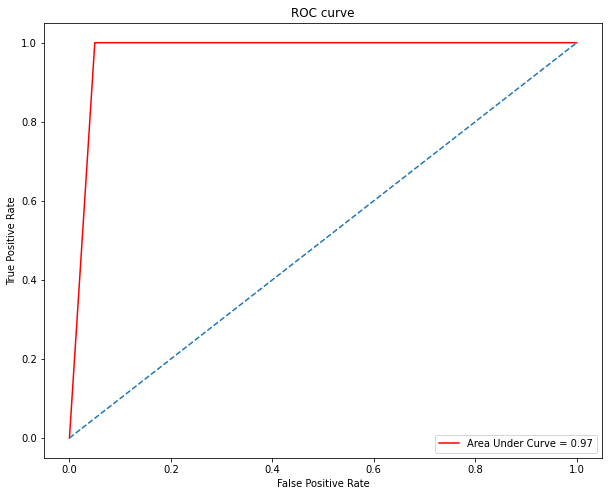

In [107]:
# let's see the roc curve for this models performance
roc_curve(true_label, y_pred_6)

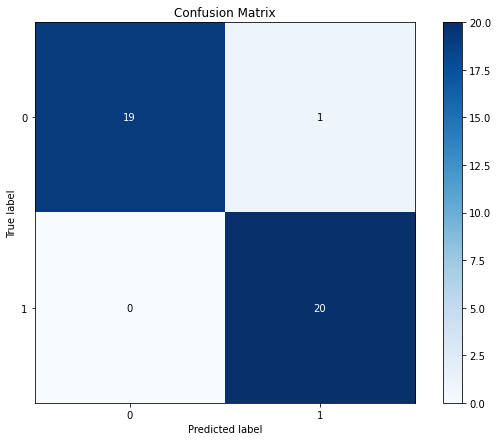

In [108]:
confusion_matrix(true_label, y_pred_6)

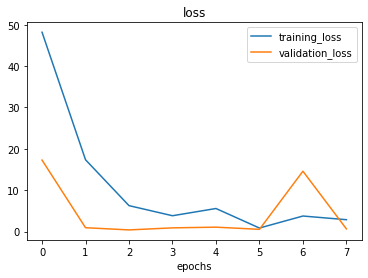

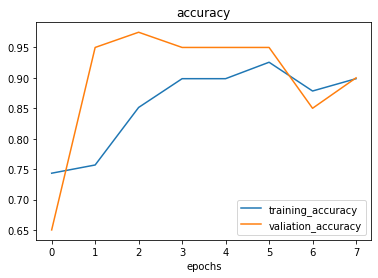

In [109]:
# let's plot loss and accuracy curve for model_6 performance
plot_loss_curves(history_6)

## MODEL 7: TRANSFER LEARNING WITH FEATURE EXTRACTION USING FUNCTIONAL API USING `NasNetLarge` BASE MODEL

In [110]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# create base model
input_shape = (150,150,3)
base_model = tf.keras.applications.DenseNet201(include_top=False)
base_model.trainable = False # we will freeze the base model layers

# create functional model
inputs = layers.Input(shape=input_shape, name='input_layer')
x = base_model(inputs, training=False) # setting base model to inference mode 
x = layers.Flatten(name='flattening_layer')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(2, activation='sigmoid')(x)
model_7 = tf.keras.Model(inputs, outputs)

# let's compile the model
model_7.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(lr=0.001),
              metrics=['accuracy'])

74850304/74836368 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [111]:
history_7 = model_7.fit(train_generator, epochs=5, steps_per_epoch=len(train_generator),
                      validation_data = validation_generator,
                      validation_steps = len(validation_generator),
                      callbacks=[create_tensorboard_callback("training_logs", "DenseNet201"), 
                                 model_checkpoint, early_stopping_callback ])

saving log files to : training_logs/DenseNet201/211105-135733
Epoch 1/5
10/10 [==============================] - 32s 2s/step - loss: 87.2120 - accuracy: 0.5135 - val_loss: 2.2236 - val_accuracy: 0.9000
Epoch 2/5
10/10 [==============================] - 8s 803ms/step - loss: 2.9491 - accuracy: 0.8851 - val_loss: 1.6645 - val_accuracy: 0.8500
Epoch 3/5
10/10 [==============================] - 8s 784ms/step - loss: 5.6100 - accuracy: 0.7905 - val_loss: 0.5984 - val_accuracy: 0.9250
Epoch 4/5
10/10 [==============================] - 8s 802ms/step - loss: 2.4824 - accuracy: 0.8716 - val_loss: 0.7359 - val_accuracy: 0.9250
Epoch 5/5
10/10 [==============================] - 8s 768ms/step - loss: 3.1716 - accuracy: 0.8716 - val_loss: 5.0888e-04 - val_accuracy: 1.0000


In [112]:
# model_7 summary
model_7.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 150, 150, 3)]     0         
_________________________________________________________________
densenet201 (Functional)     (None, None, None, 1920)  18321984  
_________________________________________________________________
flattening_layer (Flatten)   (None, 30720)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               15729152  
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 1026      
Total params: 34,052,162
Trainable params: 15,730,178
Non-trainable params: 18,321,984
______________________________________

In [113]:
# let's see the layers of base model
for layer_number, layer in enumerate(model_7.layers[1].layers):
  print(layer_number, " ", layer.name, layer.dtype_policy, layer.trainable)

0   input_6 <Policy "float32"> False
1   zero_padding2d <Policy "mixed_float16"> False
2   conv1/conv <Policy "mixed_float16"> False
3   conv1/bn <Policy "mixed_float16"> False
4   conv1/relu <Policy "mixed_float16"> False
5   zero_padding2d_1 <Policy "mixed_float16"> False
6   pool1 <Policy "mixed_float16"> False
7   conv2_block1_0_bn <Policy "mixed_float16"> False
8   conv2_block1_0_relu <Policy "mixed_float16"> False
9   conv2_block1_1_conv <Policy "mixed_float16"> False
10   conv2_block1_1_bn <Policy "mixed_float16"> False
11   conv2_block1_1_relu <Policy "mixed_float16"> False
12   conv2_block1_2_conv <Policy "mixed_float16"> False
13   conv2_block1_concat <Policy "mixed_float16"> False
14   conv2_block2_0_bn <Policy "mixed_float16"> False
15   conv2_block2_0_relu <Policy "mixed_float16"> False
16   conv2_block2_1_conv <Policy "mixed_float16"> False
17   conv2_block2_1_bn <Policy "mixed_float16"> False
18   conv2_block2_1_relu <Policy "mixed_float16"> False
19   conv2_block2_2_con

In [114]:
# let's make the predictions
pred_prob = model_7.predict(validation_generator)
pred_prob[:10]

array([[1.000e+00, 0.000e+00],
       [1.000e+00, 1.537e-03],
       [1.000e+00, 0.000e+00],
       [1.000e+00, 9.990e-01],
       [1.000e+00, 3.290e-02],
       [1.000e+00, 2.453e-04],
       [1.000e+00, 1.226e-01],
       [1.000e+00, 5.308e-01],
       [1.000e+00, 0.000e+00],
       [1.000e+00, 8.459e-04]], dtype=float16)

In [115]:
y_pred_7 = tf.argmax(pred_prob, axis=1)
y_pred_7

<tf.Tensor: shape=(40,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])>

In [117]:
model_7_parameters = calculate_metrics(true_label, y_pred_7)
model_7_parameters

{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0}

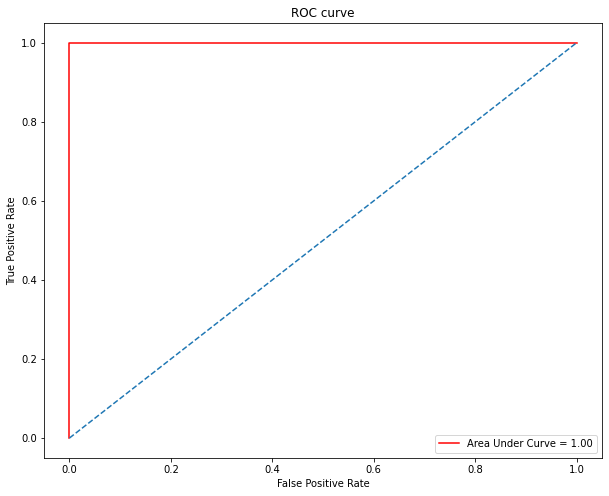

In [118]:
# let's see the roc curve
roc_curve(true_label, y_pred_7)

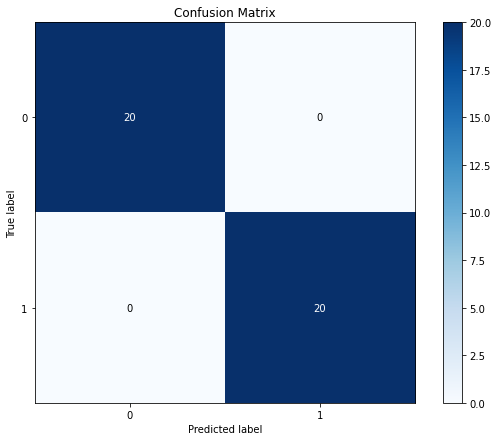

In [119]:
# let's see the confusion matrix for the model_7 performance
confusion_matrix(true_label, y_pred_7)

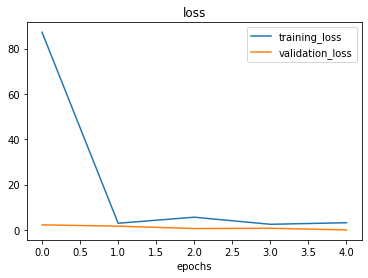

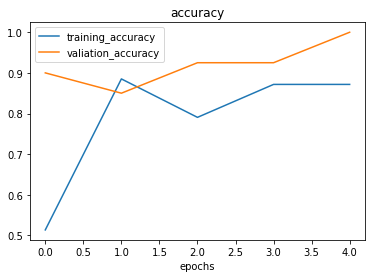

In [120]:
# let's see loss and accuracy curve for model_7
plot_loss_curves(history_7)

## MODEL 8: FINE TUNING `MODEL 1`

Although we are getting good accuracy and we could have skip this part in our case here, but for purpose of completeness, we will fine tune our model 1.

for fine tuning, we will unfreeze the top 10 layers of the `VGG16` model and then will train the model. This way the chances of overfitting increases, so we will reduce the learning rate when approaching the minima of the loss function curve. This can help us in reaching minima efficiently. 

In [121]:
# let's see the different layers present in model_1
model_1.layers

In [122]:
model_1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 150, 150, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
flattening_layer (Flatten)   (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 514       
Total params: 16,812,610
Trainable params: 2,097,922
Non-trainable params: 14,714,688
_________________________________________

In [123]:
# let's verfiy whether these layers are trainable are not and also we will check the data type policies of these layers
for layer_number, layer in enumerate(model_1.layers):
  print(layer_number, " ", layer.name, " ", layer.trainable, " ", layer.dtype_policy)

0   input_layer   True   <Policy "float32">
1   vgg16   False   <Policy "mixed_float16">
2   flattening_layer   True   <Policy "mixed_float16">
3   dense   True   <Policy "mixed_float16">
4   dropout   True   <Policy "mixed_float16">
5   dense_1   True   <Policy "mixed_float16">


from above result, we can see that, our layer number 1 traianable parameter is set to False. it means all the layers of our layer 1 are freezed for training. we will unfreeze 10 layers in our case here.

In [124]:
# How many layers are trainable in our base model?
print(len(model_1.layers[1].trainable_variables))

0


In [125]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(model_1.layers[1].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False


In [126]:
# first of all we will unfreeze all the layers

base_model = model_1.layers[1]
base_model.trainable = True

# now freeze all layers except 
for layer in base_model.layers[:-5]:
  layer.trainable = False

# recompile the model (always recompile after any adjustment to the model)
model_1.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              metrics=['accuracy'])


"""
we reduce the learning rate by a factor of 10 while fine tuning as we are training a large model so 
there is always a chance of overfitting, so as to avoid overfitting we need to tune different parametersas well.

"""

'\nwe reduce the learning rate by a factor of 10 while fine tuning as we are training a large model so \nthere is always a chance of overfitting, so as to avoid overfitting we need to tune different parametersas well.\n\n'

In [127]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool True
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


In [128]:
# fine tune for another 5 epochs
initial_epochs = 5 # our training would start from 5th epoch as we have already trained our model for 5 epochs
fine_tuning_epochs = initial_epochs + 10

# refit the model
history_fine_tuned = model_1.fit(train_generator, epochs=fine_tuning_epochs, steps_per_epoch=len(train_generator),
                      validation_data = validation_generator,
                      initial_epoch = history_1.epoch[-1], # start from the previous last epoch
                      validation_steps = len(validation_generator),
                      callbacks=[create_tensorboard_callback("training_logs", "VGG16_fine_tuned"), 
                                 model_checkpoint, early_stopping_callback ])

saving log files to : training_logs/VGG16_fine_tuned/211105-135928
Epoch 5/15
10/10 [==============================] - 11s 1s/step - loss: 2.2132 - accuracy: 0.7162 - val_loss: 0.1254 - val_accuracy: 0.9500
Epoch 6/15
10/10 [==============================] - 8s 772ms/step - loss: 0.1822 - accuracy: 0.9527 - val_loss: 0.2263 - val_accuracy: 0.9250
Epoch 7/15
10/10 [==============================] - 7s 758ms/step - loss: 0.1998 - accuracy: 0.9122 - val_loss: 0.4335 - val_accuracy: 0.8500
Epoch 8/15
10/10 [==============================] - 8s 767ms/step - loss: 0.2263 - accuracy: 0.8919 - val_loss: 0.0846 - val_accuracy: 0.9750
Epoch 9/15
10/10 [==============================] - 8s 785ms/step - loss: 0.1308 - accuracy: 0.9527 - val_loss: 0.2244 - val_accuracy: 0.9000
Epoch 10/15
10/10 [==============================] - 7s 748ms/step - loss: 0.1649 - accuracy: 0.9459 - val_loss: 0.0713 - val_accuracy: 0.9500
Epoch 11/15
10/10 [==============================] - 7s 736ms/step - loss: 0.1629 

In [129]:
# let's make the predictions
pred_prob = model_1.predict(validation_generator)
pred_prob[:10]

array([[0.981   , 0.0343  ],
       [0.356   , 0.4822  ],
       [0.9883  , 0.0287  ],
       [0.8867  , 0.1238  ],
       [0.6455  , 0.1576  ],
       [0.3564  , 0.5083  ],
       [0.9336  , 0.05673 ],
       [0.911   , 0.0703  ],
       [0.997   , 0.008675],
       [0.851   , 0.1365  ]], dtype=float16)

In [130]:
y_pred_fine_tuned = tf.argmax(pred_prob, axis=1)
y_pred_fine_tuned

<tf.Tensor: shape=(40,), dtype=int64, numpy=
array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])>

In [133]:
# let's see the results from different evaluation metrics
model_8_parameters = calculate_metrics(true_label, y_pred_fine_tuned)
model_8_parameters

{'accuracy': 0.925, 'precision': 0.8695652, 'recall': 1.0}

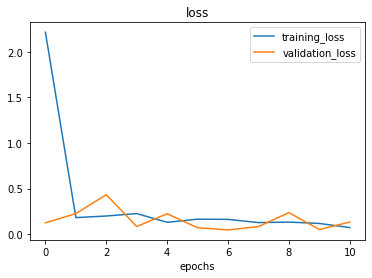

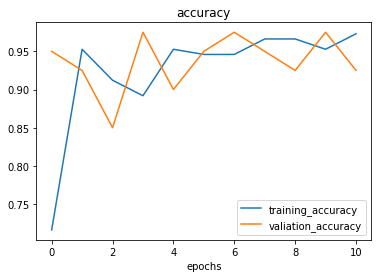

In [134]:
# let's see the loss and accuracy curve for the model performance
plot_loss_curves(history_fine_tuned)

looks like we have not acheived higher accuracy after fine tuning.

our model_1 was having much better validation accuracy than this fine tuned model.

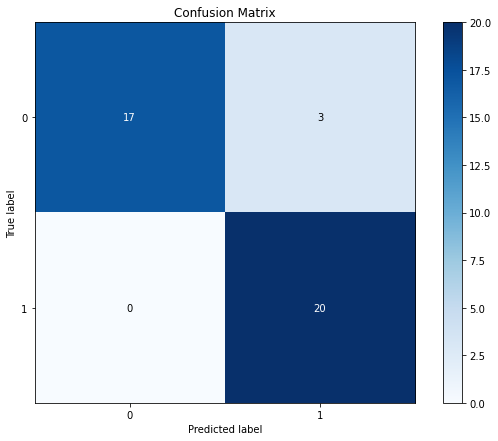

In [135]:
confusion_matrix(true_label, y_pred_fine_tuned)

## MODEL 9: IMAGE CLASSIFICATION USING `RANDOM FOREST CLASSIFIER` & `VGG16` AS FEATURE EXTRACTOR

below image credit - https://towardsdatascience.com/classification-with-random-forests-in-python-29b8381680ed

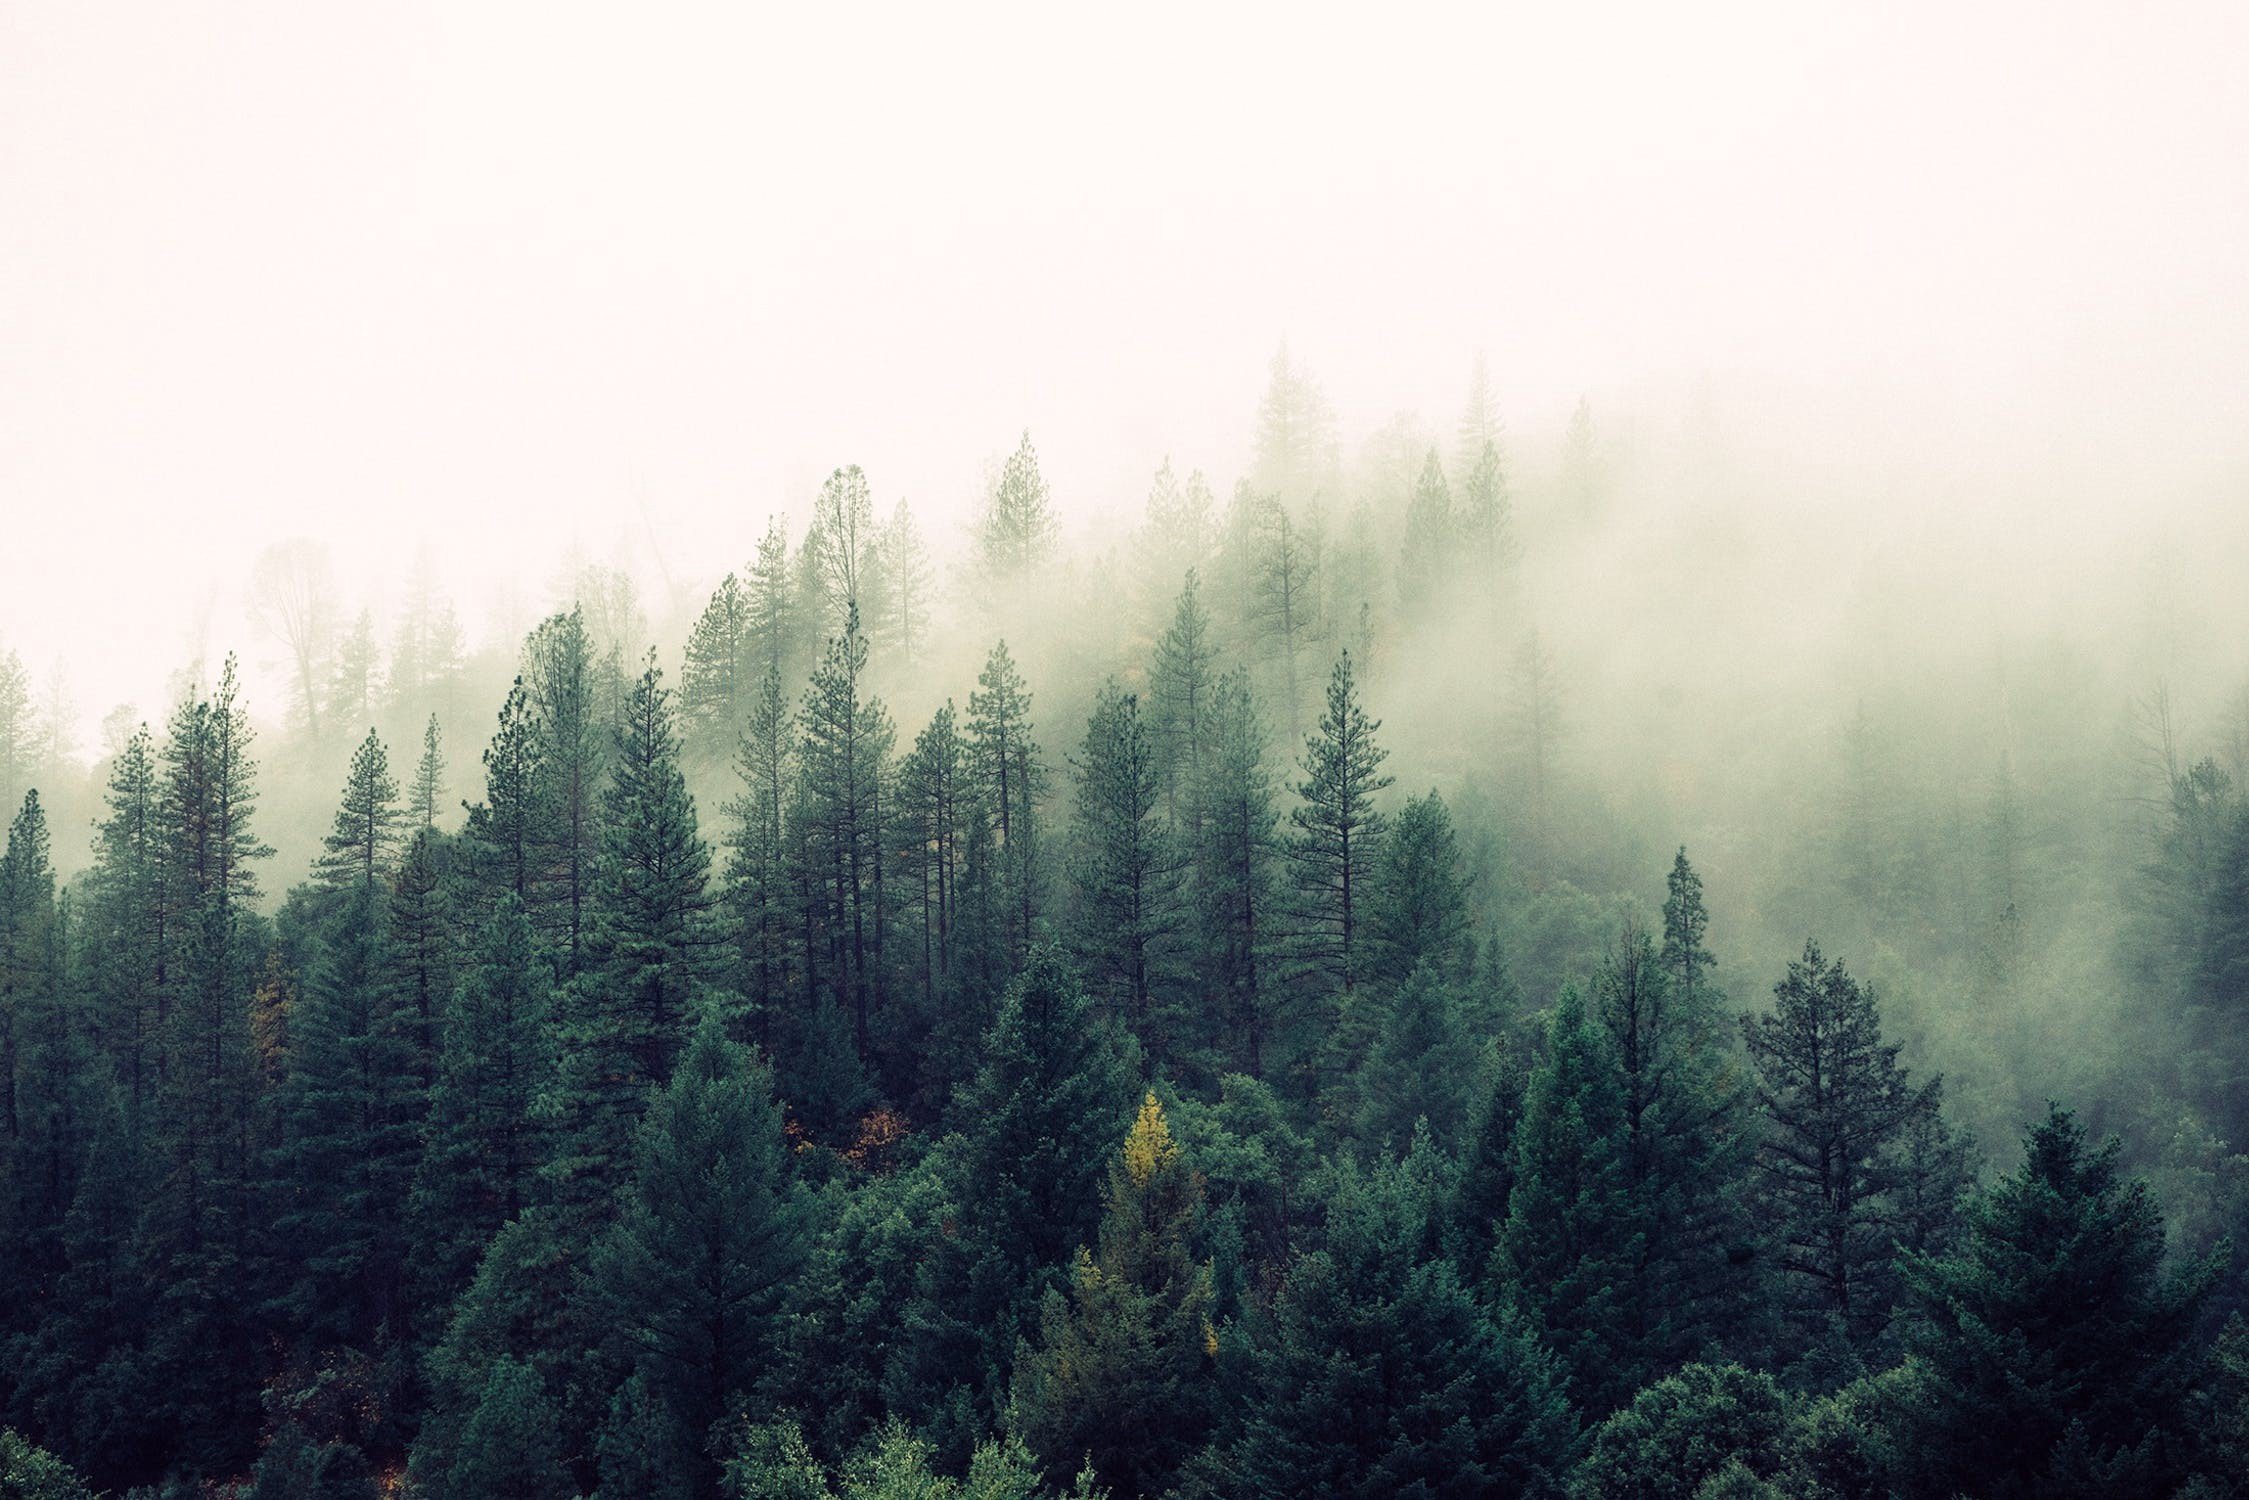

In [136]:
import numpy as np
import glob
import cv2
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import os
import seaborn as sns
from tensorflow.keras.applications.vgg16 import VGG16

print(os.listdir(train)) # just to check whether we are reading from the right folder

# let's define the size of the images
SIZE=256

# capturing training data and labels into respective lists
train_images = []
train_labels = []

for directory_path in glob.glob(train+"/*"):
  label = directory_path.split("/")[-1]
  print(label)
  for image_path in glob.glob(os.path.join(directory_path, "*.jpeg")):
    print(image_path)
    image = cv2.imread(image_path)
    image = cv2.resize(image, (SIZE, SIZE))
    train_images.append(image)
    train_labels.append(label)
  

# capturing training data and labels into respective lists
test_images = []
test_labels = []

for directory_path in glob.glob(test+"/*"):
  label = directory_path.split("/")[-1]
  print(label)
  for image_path in glob.glob(os.path.join(directory_path, "*.jpeg")):
    print(image_path)
    image = cv2.imread(image_path)
    image = cv2.resize(image, (SIZE, SIZE))
    test_images.append(image)
    test_labels.append(label)



# convert lists into array
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# enocde labels from text to integers
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train_labels)
test_labels_encoded = le.transform(test_labels)
train_labels_encoded = le.transform(train_labels)

# splitting data into training and testing (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels, test_images, test_labels

# normalize pixel values between 0 and 1
x_train, x_test = x_train/255.0, x_test/255.0

"""
we will one hot encode labels for neural network but, as we are using RandomForestClassifier instead of neural network,
we will use label encoding for our purpose. by the way, we could have done one hot encoding by the following way:-

from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
"""

# load model without classifier (without fully connected dense layer)
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

# making loaded layers as non trainable. this is important as we want to work with pretrained weights
for layer in VGG_model.layers:
  layer.trainable = False

['PNEUMONIA', 'NORMAL']
PNEUMONIA
/content/gdrive/MyDrive/covid-19 data/xray_dataset_covid19/train/PNEUMONIA/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg
/content/gdrive/MyDrive/covid-19 data/xray_dataset_covid19/train/PNEUMONIA/5CBC2E94-D358-401E-8928-965CCD965C5C.jpeg
/content/gdrive/MyDrive/covid-19 data/xray_dataset_covid19/train/PNEUMONIA/39EE8E69-5801-48DE-B6E3-BE7D1BCF3092.jpeg
/content/gdrive/MyDrive/covid-19 data/xray_dataset_covid19/train/PNEUMONIA/1B734A89-A1BF-49A8-A1D3-66FAFA4FAC5D.jpeg
/content/gdrive/MyDrive/covid-19 data/xray_dataset_covid19/train/PNEUMONIA/7C69C012-7479-493F-8722-ABC29C60A2DD.jpeg
/content/gdrive/MyDrive/covid-19 data/xray_dataset_covid19/train/PNEUMONIA/1312A392-67A3-4EBF-9319-810CF6DA5EF6.jpeg
/content/gdrive/MyDrive/covid-19 data/xray_dataset_covid19/train/PNEUMONIA/7AF6C1AF-D249-4BD2-8C26-449304105D03.jpeg
/content/gdrive/MyDrive/covid-19 data/xray_dataset_covid19/train/PNEUMONIA/2C10A413-AABE-4807-8CCE-6A2025594067.jpeg
/content/gdrive/MyDrive/covid-

In [137]:
# let's look at the summary of the loaded model
VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [138]:
# now let's use the features from convolutional network for our Random Forest Classifier
feature_extractor = VGG_model.predict(x_train)

feature = feature_extractor.reshape(feature_extractor.shape[0], -1)

x_for_training = feature # this is our input to the Random Forest Classifier

In [139]:
feature_extractor.shape # 8 * 8 * 512 = 32768

(115, 8, 8, 512)

In [140]:
feature.shape

(115, 32768)

In [141]:
# let's train our model on Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model_9 = RandomForestClassifier(n_estimators = 50, random_state=42)
model_9.fit(x_for_training, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [142]:
# now let's make the prediction

"""
for the purpose of prediction, we will send our data again through the same feature extraction process and then will made a 
prediction over it.
"""
x_test_feature = VGG_model.predict(x_test)
x_test_feature = x_test_feature.reshape(x_test_feature.shape[0], -1)

In [143]:
x_test_feature.shape

(35, 32768)

In [144]:
# now let's make the prediction using our trained RandomForestClassifier model
y_pred_9 = model_9.predict(x_test_feature)
y_pred_9 = le.transform(y_pred_9)
y_pred_9

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [184]:
true_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [145]:
test_labels_encoded # this is the original label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [147]:
# now let's see the different scores from evaluation metrics
model_9_parameters = calculate_metrics(test_labels_encoded, y_pred_9)
model_9_parameters

{'accuracy': 0.9714286, 'precision': 1.0, 'recall': 0.93333334}

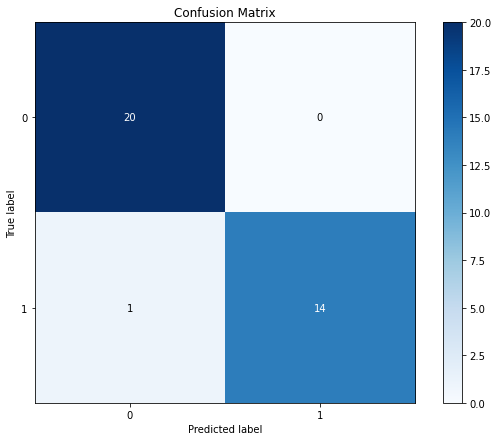

In [148]:
# let's see the confusion metrics for the same
confusion_matrix(test_labels_encoded, y_pred_9)

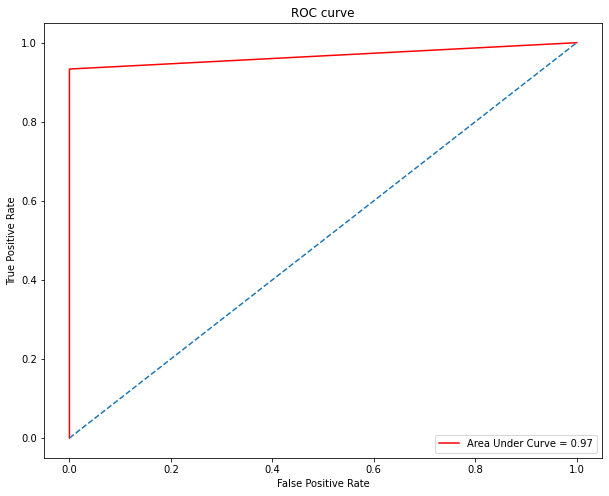

In [149]:
# let's see the roc curve for models performance
roc_curve(test_labels_encoded, y_pred_9)

## MODEL 10: IMAGE CLASSIFICATION USING `XGBoost` & `VGG16` AS FEATURE EXTRACTOR

In [150]:
import xgboost as xgb 
model_10 = xgb.XGBClassifier()
model_10.fit(x_for_training, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [151]:
#Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

In [152]:
y_pred_10 = model_10.predict(x_test_feature)
y_pred_10 = le.transform(y_pred_10)
y_pred_10

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [154]:
# let's see the evaluation results from the different classification metrics
model_10_parameters = calculate_metrics(test_labels_encoded, y_pred_10)
model_10_parameters

{'accuracy': 0.8857143, 'precision': 0.7894737, 'recall': 1.0}

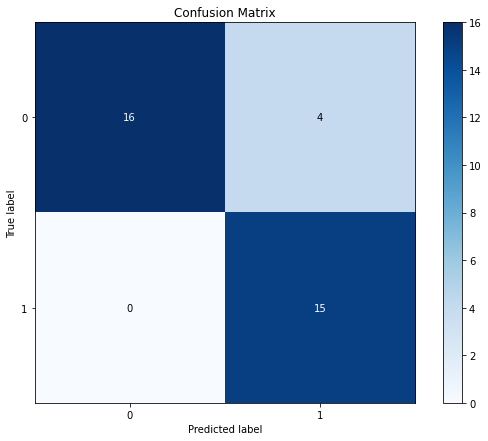

In [155]:
confusion_matrix(test_labels_encoded, y_pred_10)

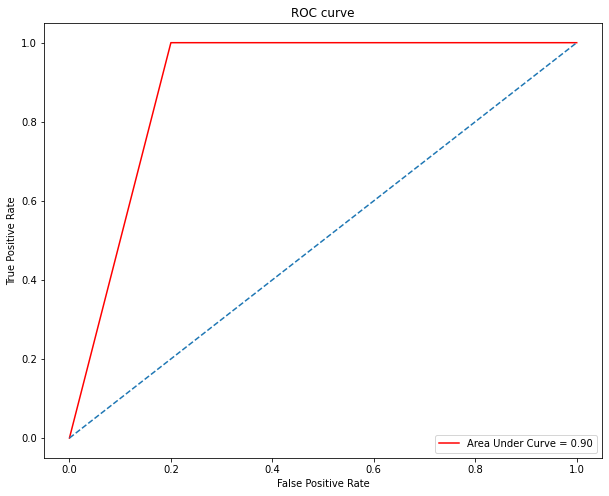

In [156]:
roc_curve(test_labels_encoded, y_pred_10)

## MODEL 11: IMAGE CLASSIFICATION USING `Support Vector Classifier` & `VGG16` AS FEATURE EXTRACTOR

In [157]:
from sklearn import svm
model_11 = svm.SVC()
model_11.fit(x_for_training, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [158]:
#Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

In [159]:
y_pred_11 = model_11.predict(x_test_feature)
y_pred_11 = le.transform(y_pred_11)
y_pred_11

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [161]:
# let's see the evaluation results from the different classification metrics
model_11_parameters = calculate_metrics(test_labels_encoded, y_pred_11)
model_11_parameters

{'accuracy': 0.94285715, 'precision': 1.0, 'recall': 0.8666667}

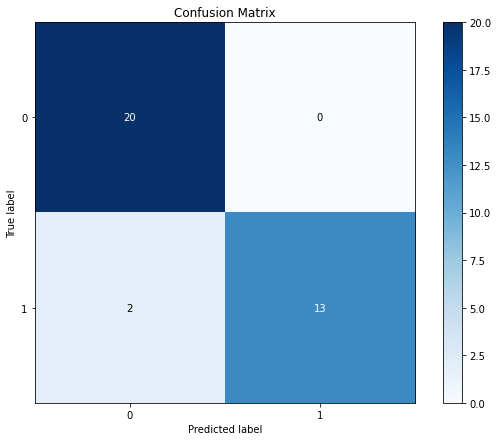

In [162]:
confusion_matrix(test_labels_encoded, y_pred_11)

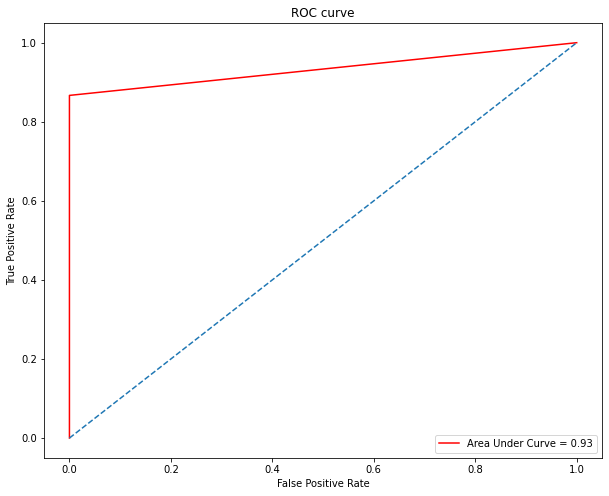

In [163]:
roc_curve(test_labels_encoded, y_pred_11)

### F1 score evaluation

F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if we have an uneven class distribution. in our case we don't have uneven class distribution.

In [164]:
def f1_score(precision, recall):
  """
  this function will take precision and recall and calculate f1_Score
  """
  f1 = 2 * ((precision*recall)/(precision+recall))
  return f1

In [170]:
# for exmaple we can calculate the f1_score my below method
f1_score_model_2 = f1_score(model_2_precision, model_2_recall)
f1_score_model_2

0.9743589162826538

## Visualize the `accuracy`, `precision`, and `recall` of different models

In [212]:
model_1_accuracy = model_1_parameters['accuracy']
model_2_accuracy = model_2_parameters['accuracy']
model_3_accuracy = model_3_parameters['accuracy']
model_4_accuracy = model_4_parameters['accuracy']
model_5_accuracy = model_5_parameters['accuracy']
model_6_accuracy = model_6_parameters['accuracy']
model_7_accuracy = model_7_parameters['accuracy']
model_8_accuracy  = model_8_parameters['accuracy']
model_9_accuracy = model_9_parameters['accuracy']
model_10_accuracy = model_10_parameters['accuracy']
model_11_accuracy = model_11_parameters['accuracy']

accuracy_dict = {
    "VGG16": model_1_accuracy,
    "CNN": model_2_accuracy,
    "InceptionV3": model_3_accuracy,
    "InceptionResNetV2": model_4_accuracy,
    "Xception": model_5_accuracy,
    "MobileNet": model_6_accuracy,
    "NasNetLarge": model_7_accuracy,
    "VGG16_fine_tuned": model_8_accuracy,
    "RVC": model_9_accuracy,
    "XGBoost": model_10_accuracy,
    "SVC": model_11_accuracy
}
accuracy_dict

{'CNN': 0.975,
 'InceptionResNetV2': 0.9,
 'InceptionV3': 0.725,
 'MobileNet': 0.975,
 'NasNetLarge': 1.0,
 'RVC': 0.9714286,
 'SVC': 0.94285715,
 'VGG16': 0.975,
 'VGG16_fine_tuned': 0.925,
 'XGBoost': 0.8857143,
 'Xception': 0.975}

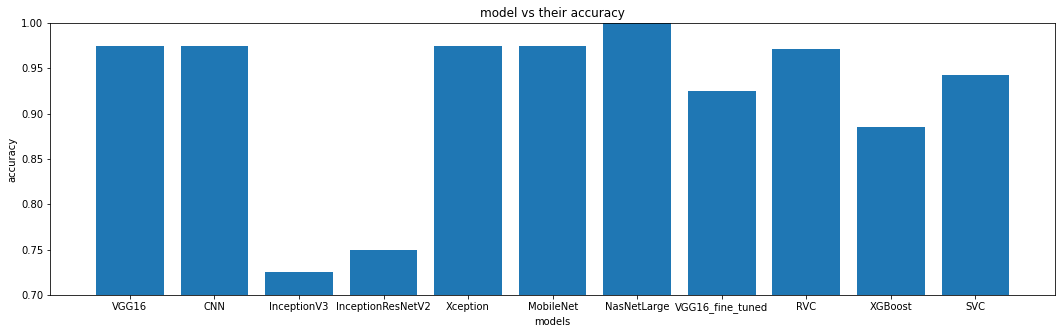

In [211]:
# now let's plot the bar graph for better visualization of the the accuracy obtained from different models.\
values = accuracy_dict.values()
names = accuracy_dict.keys()
value_list = list(values)
plt.figure(figsize=(18,5))
plt.bar(names, values)
plt.ylim((0.7,1))
plt.xlabel("models")
plt.ylabel("accuracy")
plt.title("model vs their accuracy")
plt.show()

In [209]:
model_1_precision = model_1_parameters['precision']
model_2_precision = model_2_parameters['precision']
model_3_precision = model_3_parameters['precision']
model_4_precision = model_4_parameters['precision']
model_5_precision = model_5_parameters['precision']
model_6_precision = model_6_parameters['precision']
model_7_precision = model_7_parameters['precision']
model_8_precision = model_8_parameters['precision']
model_9_precision = model_9_parameters['precision']
model_10_precision = model_10_parameters['precision']
model_11_precision = model_11_parameters['precision']

precision_dict = {
    "VGG16": model_1_precision,
    "CNN": model_2_precision,
    "InceptionV3": model_3_precision,
    "InceptionResNetV2": model_4_precision,
    "Xception": model_5_precision,
    "MobileNet": model_6_precision,
    "NasNetLarge": model_7_precision,
    "VGG_fine_tuned": model_8_precision,
    "RFC": model_9_precision,
    "XGBoost": model_10_precision,
    "SVC": model_11_precision
}

precision_dict

{'CNN': 1.0,
 'InceptionResNetV2': 1.0,
 'InceptionV3': 0.6451613,
 'MobileNet': 0.95238096,
 'NasNetLarge': 1.0,
 'RFC': 1.0,
 'SVC': 1.0,
 'VGG16': 0.95238096,
 'VGG_fine_tuned': 0.8695652,
 'XGBoost': 0.7894737,
 'Xception': 1.0}

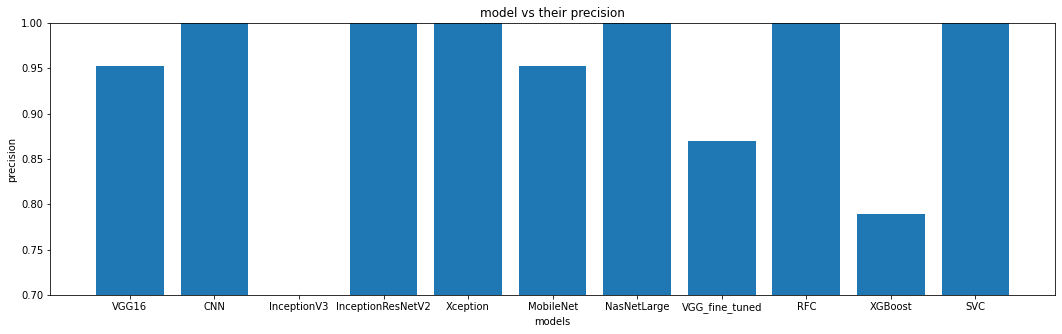

In [213]:
# now let's plot the bar graph for better visualization of the the accuracy obtained from different models.\
values = precision_dict.values()
names = precision_dict.keys()
value_list = list(values)
plt.figure(figsize=(18,5))
plt.bar(names, values)
plt.ylim((0.7,1))
plt.xlabel("models")
plt.ylabel("precision")
plt.title("model vs their precision")
plt.show()

In [207]:
model_1_recall = model_1_parameters['recall']
model_2_recall = model_2_parameters['recall']
model_3_recall = model_3_parameters['recall']
model_4_recall = model_4_parameters['recall']
model_5_recall = model_5_parameters['recall']
model_6_recall = model_6_parameters['recall']
model_7_recall = model_7_parameters['recall']
model_8_recall = model_8_parameters['recall']
model_9_recall = model_9_parameters['recall']
model_10_recall = model_10_parameters['recall']
model_11_recall = model_11_parameters['recall']

recall_dict = {
    "VGG16": model_1_recall,
    "CNN": model_2_recall,
    "InceptionV3": model_3_recall,
    "InceptionResNetV2": model_4_recall,
    "Xception": model_5_recall,
    "MobileNet": model_6_recall,
    "NasNetLarge": model_7_recall,
    "VGG_fine_tuned": model_8_recall,
    "RFC": model_9_recall,
    "XGBoost": model_10_recall,
    "SVC": model_11_recall
}

recall_dict

{'CNN': 0.95,
 'InceptionResNetV2': 0.8,
 'InceptionV3': 1.0,
 'MobileNet': 1.0,
 'NasNetLarge': 1.0,
 'RFC': 0.93333334,
 'SVC': 0.8666667,
 'VGG16': 1.0,
 'VGG_fine_tuned': 1.0,
 'XGBoost': 1.0,
 'Xception': 0.95}

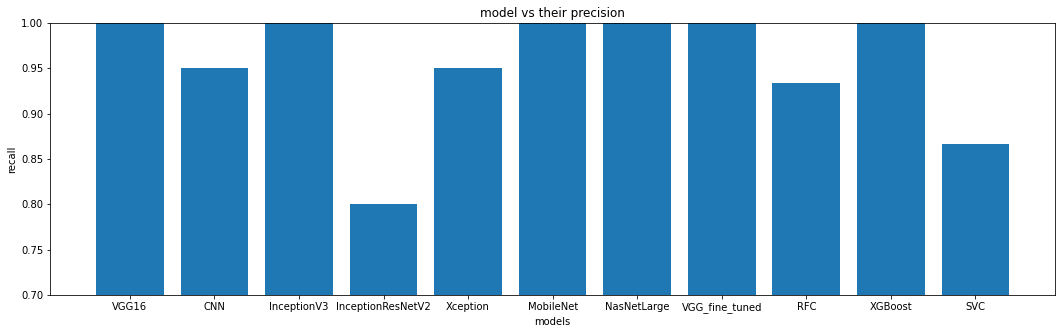

In [214]:
# now let's plot the bar graph for better visualization of the the accuracy obtained from different models.\
values = recall_dict.values()
names = recall_dict.keys()
value_list = list(values)
plt.figure(figsize=(18,5))
plt.bar(names, values)
plt.ylim((0.7,1))
plt.xlabel("models")
plt.ylabel("recall")
plt.title("model vs their precision")
plt.show()

### let's make a dataframe consisting of `accuracy`, `precision` and `recall` of individual models

In [216]:
import pandas as pd

accuracy = [model_1_accuracy, model_2_accuracy, model_3_accuracy, model_4_accuracy, model_5_accuracy, 
            model_6_accuracy, model_7_accuracy, model_8_accuracy, model_9_accuracy, model_10_accuracy, model_11_accuracy]
precision = [model_1_precision, model_2_precision, model_3_precision, model_4_precision, model_5_precision, model_6_precision,
             model_7_precision, model_8_precision, model_9_precision, model_10_precision, model_11_precision]
recall = [model_1_recall, model_2_recall, model_3_recall, model_4_recall, model_5_recall, model_6_recall, model_7_recall,
          model_8_recall, model_9_recall, model_10_recall, model_11_recall]
models = ["VGG16", "CNN", "InceptionV3", "InceptionResNetV2", "Xception", "MobileNet", "NasNetLarge", "VGG_fine_tuned",
          "RFC", "XGBoost", "SVC"]

f1score = []
for i in range(0, 11):
  f1score.append(f1_score(accuracy[i], recall[i]))

f1score

[0.9873417615890503,
 0.9623377323150635,
 0.8405797481536865,
 0.8470587730407715,
 0.9623377323150635,
 0.9873417615890503,
 1.0,
 0.9610390067100525,
 0.9520000219345093,
 0.939393937587738,
 0.9031578898429871]

In [217]:
precision

[0.95238096,
 1.0,
 0.6451613,
 1.0,
 1.0,
 0.95238096,
 1.0,
 0.8695652,
 1.0,
 0.7894737,
 1.0]

In [218]:
dataframe = pd.DataFrame({
                         "accuracy": accuracy,
                          "f1_score": f1score,
                         "recall": recall,
                         "precision": precision}, index=models)

dataframe

accuracy  f1_score    recall  precision
VGG16              0.975000  0.987342  1.000000   0.952381
CNN                0.975000  0.962338  0.950000   1.000000
InceptionV3        0.725000  0.840580  1.000000   0.645161
InceptionResNetV2  0.900000  0.847059  0.800000   1.000000
Xception           0.975000  0.962338  0.950000   1.000000
MobileNet          0.975000  0.987342  1.000000   0.952381
NasNetLarge        1.000000  1.000000  1.000000   1.000000
VGG_fine_tuned     0.925000  0.961039  1.000000   0.869565
RFC                0.971429  0.952000  0.933333   1.000000
XGBoost            0.885714  0.939394  1.000000   0.789474
SVC                0.942857  0.903158  0.866667   1.000000

### let's plot the validation accuracy cruve for all models into one single graph for better visualization

we will make use of history of different models which we have obtained at the time of training.

In [219]:
history_1.epoch[-1]

4

Text(0, 0.5, 'validation_accuracy')

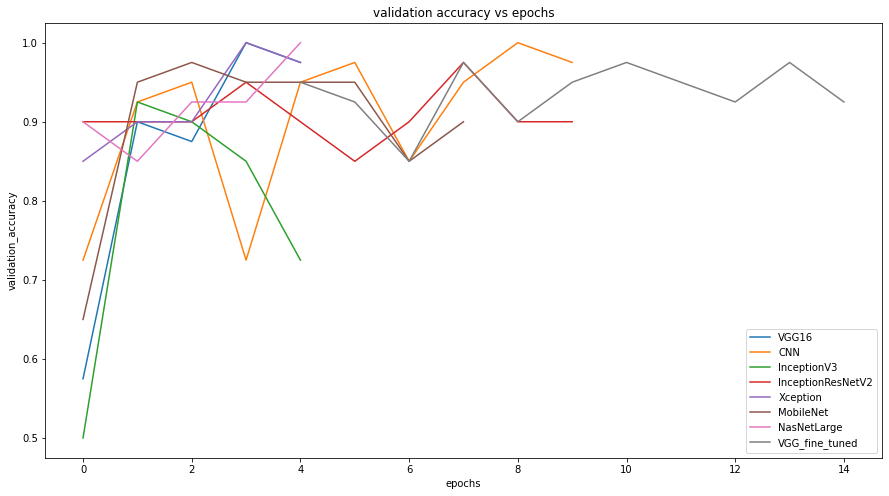

In [220]:
plt.figure(figsize=(15,8))
plt.plot(history_1.epoch, history_1.history['val_accuracy'], label="VGG16")
plt.plot(history_2.epoch, history_2.history['val_accuracy'], label="CNN")
plt.plot(history_3.epoch, history_3.history['val_accuracy'], label="InceptionV3")
plt.plot(history_4.epoch, history_4.history['val_accuracy'], label="InceptionResNetV2")
plt.plot(history_5.epoch, history_5.history['val_accuracy'], label="Xception")
plt.plot(history_6.epoch, history_6.history['val_accuracy'], label="MobileNet")
plt.plot(history_7.epoch, history_7.history['val_accuracy'], label="NasNetLarge")
plt.plot(history_fine_tuned.epoch, history_fine_tuned.history['val_accuracy'], label="VGG_fine_tuned")
plt.legend()
plt.title('validation accuracy vs epochs')
plt.xlabel('epochs')
plt.ylabel('validation_accuracy')

### let's make the roc curve obtained from the performace of different models

we will plot the different curves into one for better visualization

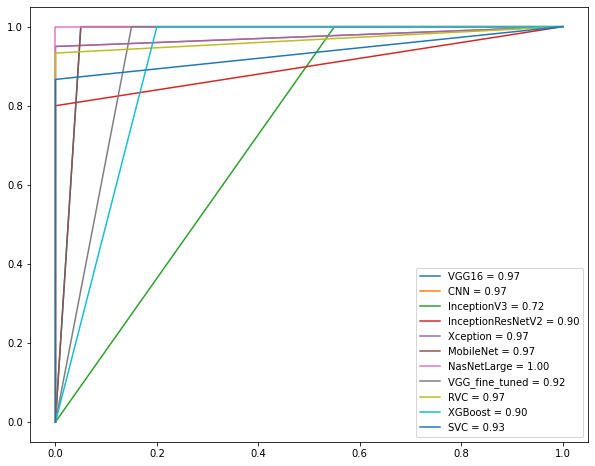

In [222]:
plt.figure(figsize=(10,8))
from sklearn.metrics import roc_curve, auc
false_positive_rate_1, true_positive_rate_1, thresholds_1 = roc_curve(true_label, y_pred_1)
roc_auc_1 = auc(false_positive_rate_1, true_positive_rate_1) 
false_positive_rate_2, true_positive_rate_2, thresholds_2 = roc_curve(true_label, y_pred_2)
roc_auc_2 = auc(false_positive_rate_2, true_positive_rate_2) 
false_positive_rate_3, true_positive_rate_3, thresholds_3 = roc_curve(true_label, y_pred_3)
roc_auc_3 = auc(false_positive_rate_3, true_positive_rate_3) 
false_positive_rate_4, true_positive_rate_4, thresholds_4 = roc_curve(true_label, y_pred_4)
roc_auc_4 = auc(false_positive_rate_4, true_positive_rate_4) 
false_positive_rate_5, true_positive_rate_5, thresholds_5 = roc_curve(true_label, y_pred_5)
roc_auc_5 = auc(false_positive_rate_5, true_positive_rate_5) 
false_positive_rate_6, true_positive_rate_6, thresholds_6 = roc_curve(true_label, y_pred_6)
roc_auc_6 = auc(false_positive_rate_6, true_positive_rate_6) 
false_positive_rate_7, true_positive_rate_7, thresholds_7 = roc_curve(true_label, y_pred_7)
roc_auc_7 = auc(false_positive_rate_7, true_positive_rate_7) 
false_positive_rate_8, true_positive_rate_8, thresholds_8 = roc_curve(true_label, y_pred_fine_tuned)
roc_auc_8 = auc(false_positive_rate_8, true_positive_rate_8)
false_positive_rate_9, true_positive_rate_9, thresholds_9 = roc_curve(test_labels_encoded, y_pred_9)
roc_auc_9 = auc(false_positive_rate_9, true_positive_rate_9)
false_positive_rate_10, true_positive_rate_10, thresholds_10 = roc_curve(test_labels_encoded, y_pred_10)
roc_auc_10 = auc(false_positive_rate_10, true_positive_rate_10)
false_positive_rate_11, true_positive_rate_11, thresholds_11 = roc_curve(test_labels_encoded, y_pred_11)
roc_auc_11 = auc(false_positive_rate_11, true_positive_rate_11)    
plt.plot(false_positive_rate_1, true_positive_rate_1, label = 'VGG16 = %0.2f' % roc_auc_1)
plt.plot(false_positive_rate_2, true_positive_rate_2, label = 'CNN = %0.2f' % roc_auc_2)
plt.plot(false_positive_rate_3, true_positive_rate_3, label = 'InceptionV3 = %0.2f' % roc_auc_3)
plt.plot(false_positive_rate_4, true_positive_rate_4, label = 'InceptionResNetV2 = %0.2f' % roc_auc_4)
plt.plot(false_positive_rate_5, true_positive_rate_5, label = 'Xception = %0.2f' % roc_auc_5)
plt.plot(false_positive_rate_6, true_positive_rate_6, label = 'MobileNet = %0.2f' % roc_auc_6)
plt.plot(false_positive_rate_7, true_positive_rate_7, label = 'NasNetLarge = %0.2f' % roc_auc_7)
plt.plot(false_positive_rate_8, true_positive_rate_8, label = 'VGG_fine_tuned = %0.2f' % roc_auc_8)
plt.plot(false_positive_rate_9, true_positive_rate_9, label = 'RVC = %0.2f' % roc_auc_9)
plt.plot(false_positive_rate_10, true_positive_rate_10, label = 'XGBoost = %0.2f' % roc_auc_10)
plt.plot(false_positive_rate_11, true_positive_rate_11, label = 'SVC = %0.2f' % roc_auc_11)
plt.legend()
plt.show()